# Kaggle

A UK-based online retail store has captured the sales data for different products for the period of one year (Nov 2016 to Dec 2017). The organization sells gifts primarily on the online platform. The customers who make a purchase consume directly for themselves. There are small businesses that buy in bulk and sell to other customers through the retail outlet channel.

## Project Objective:
Find significant customers for the business who make high purchases of their favourite products. The organization wants to roll out a loyalty program to the high-value customers after identification of segments. Use the clustering methodology to segment customers into groups:

## Domain: E-commerce

#### Dataset Description:
This is a transnational dataset that contains all the transactions occurring between Nov-2016 to Dec-2017 for a UK-based online retail store.

#### Attribute Description
InvoiceNo Invoice number (A 6-digit integral number uniquely assigned to each transaction)
StockCode Product (item) code
Description Product (item) name
Quantity The quantities of each product (item) per transaction
InvoiceDate The day when each transaction was generated
UnitPrice Unit price (Product price per unit)
CustomerID Customer number (Unique ID assigned to each customer)
Country Country name (The name of the country where each customer resides)
Analysis tasks to be performed:
Use the clustering methodology to segment customers into groups:
Use the following clustering algorithms:

#### K means
Hierarchical
• Identify the right number of customer segments.
• Provide the number of customers who are highly valued.
• Identify the clustering algorithm that gives maximum accuracy and explains robust clusters.
• If the number of observations is loaded in one of the clusters, break down that cluster further using the clustering algorithm. [ hint: Here loaded means if any cluster has more number of data points as compared to other clusters then split that clusters by increasing the number of clusters and observe, compare the results with previous results.]

# Planning IOT (input | output | tasks)

1. Input 

    - Select the MOST VALUABLE CLIENTS t}o engage in a fidellity program called "insiders", using sells data from November/2015 to December/2017

2. Output

    - Point out the customers who are most likelly to be a part of the program "INSIDERS"
    - Report the answers to the following questions:
        -- Who is ellegible for the program?
        
        -- How many clients are going to be a part of the program?
        
        -- Which are the main characteristics of these clients?
        
        -- What is the percentage of revenue coming from this group contribution?
        
        -- What is the expectation of revenue coming from this group for the next few months?
        
        -- Which are the conditions for a person to be elegible to this program?
        
        -- Which are the conditions for a person to be removed from this program?
        
        -- What is the guarantee that the "INSIDERS" program is better than the rest of the customers?
        
        -- Which actions can the marketing team take to increase revenue?
        
3. Tasks

    - Sugesting solutions:
    
        -- Who is ellegible? What defines elligibility? Who is a valuable customer to the company?
        
            * Revenue:
                ** High LTV value
                ** High frequency
                ** Large basket size
                ** Low churn probability
                ** High LTV previsibility
                
            * Cost:
                ** Low devolution number
                
            * Experience:
                ** Good feedback 
        -- How many clients are going to be a part of the program?
        
            * Number of clients
            * % to the total number of clients
        
        -- Which are the main characteristics of these clients?
        
            * Main attributes of clients:
                ** Age
                ** Country
                ** Salary
            
            * Main shopping behaviours
        
        -- What is the percentage of revenue coming from this group contribution?
            
            * Calculate company´s total revenue
            * Calculate INSIDERS cluster revenue
        
        -- What is the expectation of revenue coming from this group for the next few months?
            
            * Calculate LTV of INSIDERS cluster
            * Time series (ARMA, ARIMA, HoltWinter, etc)
        
        -- Which are the conditions for a person to be elegible to this program?
            
            * When is the evaluation taking place?
            * Is the client´s behaviour close to the INSIDERS cluster?
        
        -- Which are the conditions for a person to be removed from this program?
        
            * CLient´s behaviour is not close to the average of INSIDERS cluster
        
        -- What is the guarantee that the "INSIDERS" program is better than the rest of the customers?
        
            * Hypothesis test
            * A/B test
        
        -- Which actions can the marketing team take to increase revenue?
        
            * Discounts
            * Exclusive products
        



# 0. Imports

## Libraries

In [4]:
# Jupyter settings
from IPython.core.display      import display, HTML
from IPython.display           import Image

# data manipulation
import inflection
import datetime
import math
import random
import numpy as np
import pandas as pd
from scipy import stats as ss
from scipy.cluster import hierarchy as hc
import re

# EDA
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px

# umap
import umap

# sklearn
from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import manifold as mn
from sklearn import ensemble as en
from sklearn import mixture as mx

# metrics
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

## Functions

In [5]:
# jupyter setup
def jupyter_settings():
    
    # jupyter core settings
    display(HTML("<style>.container { width:95% !important; }</style>"))
    
    # pandas
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.expand_frame_repr', False)
    
    # matplotlib
    !pylab inline
    !matplotlib inline
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 18
    
    # seaborn
    sns.set()
    
    # yellowbrick
    yellowbrick.style.rcmod.set_aesthetic()

    
# descriptive analysis summary for numerical features
def num_analysis(num_attributes):
    
    # Cemtral tendency - mean, median
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

    # concatenate
    m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
    m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis',]
    
    # histogram
    hist = num_attributes.hist(bins=30)
    
    return m

    return hist

In [6]:
jupyter_settings()

/bin/bash: pylab: command not found
/bin/bash: matplotlib: command not found


## Data

In [7]:
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding="iso8859-1")

In [8]:
df_raw = df_raw.drop(columns=["Unnamed: 8"])

# 1. Descriptive Analysis 

In [9]:
df1 = df_raw.copy()

In [10]:
df1

InvoiceNo StockCode                          Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   29-Nov-16       2.55     17850.0  United Kingdom
1         536365     71053                  WHITE METAL LANTERN         6   29-Nov-16       3.39     17850.0  United Kingdom
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   29-Nov-16       2.75     17850.0  United Kingdom
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   29-Nov-16       3.39     17850.0  United Kingdom
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   29-Nov-16       3.39     17850.0  United Kingdom
...          ...       ...                                  ...       ...         ...        ...         ...             ...
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12    7-Dec-17       0.85     12680.0          France
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6    7-Dec-17       2.10     12680.0          France
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4    7-Dec-17       4.15     12680.0          France
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4    7-Dec-17       4.15     12680.0          France
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3    7-Dec-17       4.95     12680.0          France

[541909 rows x 8 columns]

## 1.1. Rows and Columns

In [11]:
print('Number of rows: ', df1.shape[0])
print('Number of columns: ', df1.shape[1])

Number of rows:  541909
Number of columns:  8


In [12]:
# rename columns
snakecase = lambda x: inflection.underscore(x)
df1.columns = list(map(snakecase, df1.columns))

## 1.2. Data Types

In [13]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.3. Check NA

In [14]:
df1['customer_id'].isna().sum()

135080

In [15]:
df1.isna().sum()/df1.shape[0]

invoice_no      0.000000
stock_code      0.000000
description     0.002683
quantity        0.000000
invoice_date    0.000000
unit_price      0.000000
customer_id     0.249267
country         0.000000
dtype: float64

### Fill NA

In [16]:
# replacing customer_id or dropping?
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [17]:
print(df_not_missing['customer_id'].min())
print(df_not_missing['customer_id'].max())

12346.0
18287.0


In [18]:
df1 = df_not_missing.copy()

In [19]:
# create customer_id for each unique invoice_no (purchase event) associated with a null customer_id, that will invalidade the creation of recency and frquency features for these customers. 
# That may be a possibility for filling null values but may also create distortions in the cluster analysis in the future
# Therefore, this part of the code might be invalidated later and serves only as an example of NA fillout when dropping rows reduces a considerable part of the data 
# df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
# df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup), 1) # customer_id.max() = 18287c

# merge original with reference dataframe
# df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

In [20]:
# coalesce
# df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'] )

# drop extra columns
# df1 = df1.drop(columns=['customer_id_x', 'customer_id_y'], axis=1)

# df1.head(5)

In [21]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.4. Change dtypes

In [22]:
# invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int)

df1.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price  customer_id         country
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55        17850  United Kingdom
1     536365      71053                  WHITE METAL LANTERN         6   2016-11-29        3.39        17850  United Kingdom
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75        17850  United Kingdom
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   2016-11-29        3.39        17850  United Kingdom
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   2016-11-29        3.39        17850  United Kingdom

In [23]:
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [24]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.5. Descriptive Statistics

In [25]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64'])

### Numerical Attributes

attributes      min      max     range          mean    median          std        skew       kurtosis
0     quantity -80995.0  80995.0  161990.0     12.061303      5.00   248.693064    0.182663   94317.563673
1   unit_price      0.0  38970.0   38970.0      3.460471      1.95    69.315077  452.219019  246924.542988
2  customer_id  12346.0  18287.0    5941.0  15287.690570  15152.00  1713.598197    0.029835      -1.179982

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


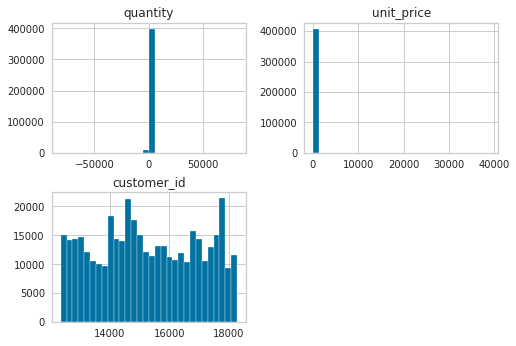

In [30]:
num_analysis(num_attributes)

# negative quantity? may be devolution
# unitary price equal to zero and negative?

### Categorical Attributes

In [31]:
cat_attributes.apply(lambda x: x.unique().shape)

invoice_no  stock_code  description  invoice_date  country
0       22190        3684         3896           305       37

### Invoice No

In [32]:
df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :] # invoice_no with letters

invoice_no stock_code                       description  quantity invoice_date  unit_price  customer_id         country
141       C536379          D                          Discount        -1   2016-11-29       27.50        14527  United Kingdom
154       C536383     35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   2016-11-29        4.65        15311  United Kingdom
235       C536391      22556    PLASTERS IN TIN CIRCUS PARADE        -12   2016-11-29        1.65        17548  United Kingdom
236       C536391      21984  PACK OF 12 PINK PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
237       C536391      21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   2016-11-29        0.29        17548  United Kingdom
...           ...        ...                               ...       ...          ...         ...          ...             ...
540449    C581490      23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   2017-12-07        0.83        14397  United Kingdom
541541    C581499          M                            Manual        -1   2017-12-07      224.69        15498  United Kingdom
541715    C581568      21258        VICTORIAN SEWING BOX LARGE        -5   2017-12-07       10.95        15311  United Kingdom
541716    C581569      84978  HANGING HEART JAR T-LIGHT HOLDER        -1   2017-12-07        1.25        17315  United Kingdom
541717    C581569      20979     36 PENCILS TUBE RED RETROSPOT        -5   2017-12-07        1.25        17315  United Kingdom

[8905 rows x 8 columns]

In [33]:
df_aux = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]

print('Number of invoices with letters: {}'.format(len(df_aux)))
print('Number of invoices with letters and negative quantity: {}'.format(len(df_aux[df_aux['quantity'] < 0])))

Number of invoices with letters: 8905
Number of invoices with letters and negative quantity: 8905


### Stock Code

In [34]:
# check stock codes with only characters
df_aux2 = df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), :]
df_aux2
# ação
# 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

invoice_no stock_code description  quantity invoice_date  unit_price  customer_id         country
45         536370       POST     POSTAGE         3   2016-11-29       18.00        12583          France
141       C536379          D    Discount        -1   2016-11-29       27.50        14527  United Kingdom
386        536403       POST     POSTAGE         1   2016-11-29       15.00        12791     Netherlands
1123       536527       POST     POSTAGE         1   2016-11-29       18.00        12662         Germany
2239       536569          M      Manual         1   2016-11-29        1.25        16274  United Kingdom
...           ...        ...         ...       ...          ...         ...          ...             ...
541216     581494       POST     POSTAGE         2   2017-12-07       18.00        12518         Germany
541541    C581499          M      Manual        -1   2017-12-07      224.69        15498  United Kingdom
541730     581570       POST     POSTAGE         1   2017-12-07       18.00        12662         Germany
541767     581574       POST     POSTAGE         2   2017-12-07       18.00        12526         Germany
541768     581578       POST     POSTAGE         3   2017-12-07       18.00        12713         Germany

[1774 rows x 8 columns]

In [35]:
print('Unique stock codes with letters: {}'.format(df_aux2['stock_code'].unique()))
print('Percentage of unique stock codes with letters: {}'.format(df_aux2['stock_code'].shape[0] / df1.shape[0]))
print('Percentage of unique stock codes  with letters and negative quantity: {}'.format(len(df_aux2[df_aux2['quantity'] < 0]) / len(df_aux2)))

Unique stock codes with letters: ['POST' 'D' 'M' 'PADS' 'DOT' 'CRUK']
Percentage of unique stock codes with letters: 0.004360554434418392
Percentage of unique stock codes  with letters and negative quantity: 0.20574971815107101


### Description

In [36]:
df1.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price  customer_id         country
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55        17850  United Kingdom
1     536365      71053                  WHITE METAL LANTERN         6   2016-11-29        3.39        17850  United Kingdom
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75        17850  United Kingdom
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   2016-11-29        3.39        17850  United Kingdom
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   2016-11-29        3.39        17850  United Kingdom

### Country

<AxesSubplot:xlabel='country', ylabel='count'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


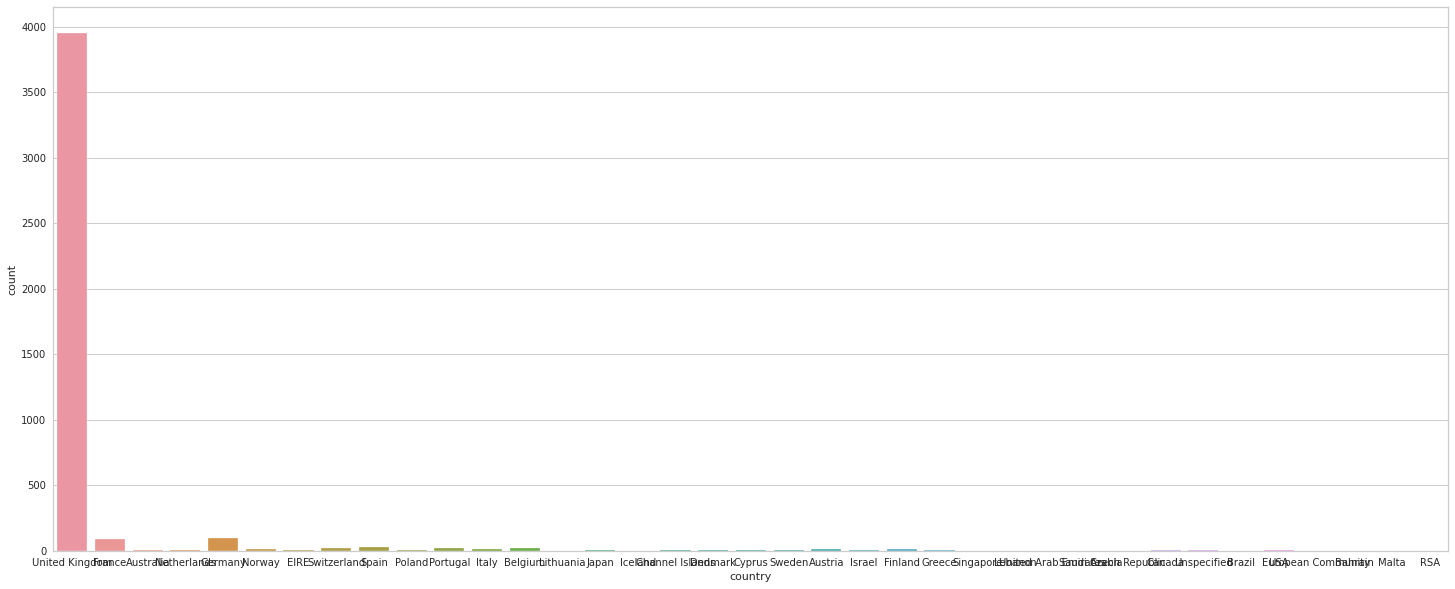

In [37]:
plt.figure(figsize=[25,10])
df_aux4 = df1[['customer_id', 'country']].drop_duplicates()
sns.countplot(x='country',data=df_aux4)

In [38]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().sort_values('customer_id', ascending=False)

customer_id
country                          
United Kingdom               3950
Germany                        95
France                         87
Spain                          31
Belgium                        25
Switzerland                    21
Portugal                       19
Italy                          15
Finland                        12
Austria                        11
Norway                         10
Netherlands                     9
Australia                       9
Denmark                         9
Channel Islands                 9
Cyprus                          8
Sweden                          8
Japan                           8
Poland                          6
USA                             4
Canada                          4
Unspecified                     4
Israel                          4
Greece                          4
EIRE                            3
Malta                           2
United Arab Emirates            2
Bahrain                         2
Czech Republic                  1
Lithuania                       1
Lebanon                         1
RSA                             1
Saudi Arabia                    1
Singapore                       1
Iceland                         1
Brazil                          1
European Community              1

In [39]:
df1['country'].unique() # european comunnity  # Unspecified

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

# 2. Filter

In [27]:
df2 = df1.copy()

In [28]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

In [29]:
# numerical attributes
df2 = df2.loc[df2['unit_price'] >= 0.04, :]
# categorical attributes
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'])]
# description
df2 = df2.drop(columns='description', axis=1)
# map
df2 = df2[~df2['stock_code'].isin(['European Community',  'Unspecified'])]
# bad customer ( devolution and small basket)
df2 = df2[~df2['customer_id'].isin([16446])]
# quantity
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchases = df2.loc[df1['quantity'] >= 0, :]

# 3. Feature Engineering

In [30]:
df3 = df2.copy()
# df2.to_csv('../data/interim/df2.csv')
df3

invoice_no stock_code  quantity invoice_date  unit_price  customer_id         country
0          536365     85123A         6   2016-11-29        2.55        17850  United Kingdom
1          536365      71053         6   2016-11-29        3.39        17850  United Kingdom
2          536365     84406B         8   2016-11-29        2.75        17850  United Kingdom
3          536365     84029G         6   2016-11-29        3.39        17850  United Kingdom
4          536365     84029E         6   2016-11-29        3.39        17850  United Kingdom
...           ...        ...       ...          ...         ...          ...             ...
541904     581587      22613        12   2017-12-07        0.85        12680          France
541905     581587      22899         6   2017-12-07        2.10        12680          France
541906     581587      23254         4   2017-12-07        4.15        12680          France
541907     581587      23255         4   2017-12-07        4.15        12680          France
541908     581587      22138         3   2017-12-07        4.95        12680          France

[405016 rows x 7 columns]

In [31]:
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)
df_ref

customer_id
0           17850
1           13047
2           12583
3           13748
4           15100
...           ...
4356        13436
4357        15520
4358        13298
4359        14569
4360        12713

[4361 rows x 1 columns]

### 1. Monetary

In [32]:
# gross revenue - Quantity x price
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']
                                
# monetary
df_monetary = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

/home/lucas/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lucas/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [33]:
df_ref.isna().sum()

customer_id       0
gross_revenue    27
dtype: int64

### 2. Recency

In [34]:
# days from last purchase
df_recency = df2_purchases.loc[:, ['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
dtype: int64

### 3. Number of purchases

In [35]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates()
                                                             .groupby( 'customer_id' )
                                                             .count()
                                                             .reset_index()
                                                             .rename( columns={'invoice_no': 'qtde_invoices'}) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
dtype: int64

### 4. Total number of products

In [36]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum()
                                                           .reset_index()
                                                           .rename( columns={'quantity': 'qtde_items'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
qtde_items       27
dtype: int64

### 5. Number of types of products

In [37]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' ).count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qtde_products'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
qtde_items       27
qtde_products    27
dtype: int64

### 6. Average ticket value

In [38]:
# Avg Ticket
df_avg_ticket = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
qtde_items       27
qtde_products    27
avg_ticket       27
dtype: int64

### 7. Average recency days

In [39]:
# Average recency days
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=['False', 'False'] )
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoince date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# average recency 
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
dtype: int64

### 8. Purchase frequency

In [40]:
df_aux = ( df2_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
frequency             27
dtype: int64

### 9. Number of returns

In [41]:
# Number of Returns
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
frequency             27
qtde_returns           0
dtype: int64

### 10. Basket size

- Invoice No = purchase
- Stock Code = Product
- Quantity = Item

In [42]:
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                  n_products=( 'quantity', 'sum' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
frequency             27
qtde_returns           0
avg_basket_size       27
dtype: int64

### 11. Unique basket size

In [43]:
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'stock_code', 'nunique' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id                  0
gross_revenue               27
recency_days                27
qtde_invoices               27
qtde_items                  27
qtde_products               27
avg_ticket                  27
avg_recency_days          1387
frequency                   27
qtde_returns                 0
avg_basket_size             27
avg_unique_basket_size      27
dtype: int64

In [44]:
df_ref

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
0           17850        5391.21         372.0           34.0      1733.0          297.0   18.152222         35.500000  17.000000          40.0        50.970588                0.617647
1           13047        3232.59          56.0            9.0      1390.0          171.0   18.904035         27.250000   0.028302          35.0       154.444444               11.666667
2           12583        6705.38           2.0           15.0      5028.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000
3           13748         948.25          95.0            5.0       439.0           28.0   33.866071         92.666667   0.017921           0.0        87.800000                4.800000
4           15100         876.00         333.0            3.0        80.0            3.0  292.000000          8.600000   0.073171          22.0        26.666667                0.333333
...           ...            ...           ...            ...         ...            ...         ...               ...        ...           ...              ...                     ...
4356        13436         196.89           1.0            1.0        76.0           12.0   16.407500               NaN   1.000000           0.0        76.000000               12.000000
4357        15520         343.50           1.0            1.0       314.0           18.0   19.083333               NaN   1.000000           0.0       314.000000               18.000000
4358        13298         360.00           1.0            1.0        96.0            2.0  180.000000               NaN   1.000000           0.0        96.000000                2.000000
4359        14569         227.39           1.0            1.0        79.0           12.0   18.949167               NaN   1.000000           0.0        79.000000               10.000000
4360        12713         794.55           0.0            1.0       505.0           37.0   21.474324               NaN   1.000000           0.0       505.000000               37.000000

[4361 rows x 12 columns]

In [45]:
df_ref.isna().sum()

customer_id                  0
gross_revenue               27
recency_days                27
qtde_invoices               27
qtde_items                  27
qtde_products               27
avg_ticket                  27
avg_recency_days          1387
frequency                   27
qtde_returns                 0
avg_basket_size             27
avg_unique_basket_size      27
dtype: int64

In [46]:
df_ref

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
0           17850        5391.21         372.0           34.0      1733.0          297.0   18.152222         35.500000  17.000000          40.0        50.970588                0.617647
1           13047        3232.59          56.0            9.0      1390.0          171.0   18.904035         27.250000   0.028302          35.0       154.444444               11.666667
2           12583        6705.38           2.0           15.0      5028.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000
3           13748         948.25          95.0            5.0       439.0           28.0   33.866071         92.666667   0.017921           0.0        87.800000                4.800000
4           15100         876.00         333.0            3.0        80.0            3.0  292.000000          8.600000   0.073171          22.0        26.666667                0.333333
...           ...            ...           ...            ...         ...            ...         ...               ...        ...           ...              ...                     ...
4356        13436         196.89           1.0            1.0        76.0           12.0   16.407500               NaN   1.000000           0.0        76.000000               12.000000
4357        15520         343.50           1.0            1.0       314.0           18.0   19.083333               NaN   1.000000           0.0       314.000000               18.000000
4358        13298         360.00           1.0            1.0        96.0            2.0  180.000000               NaN   1.000000           0.0        96.000000                2.000000
4359        14569         227.39           1.0            1.0        79.0           12.0   18.949167               NaN   1.000000           0.0        79.000000               10.000000
4360        12713         794.55           0.0            1.0       505.0           37.0   21.474324               NaN   1.000000           0.0       505.000000               37.000000

[4361 rows x 12 columns]

# 4. EDA (Exploratory Data Analysis)

In [47]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 1. Univariate Analysis

## 2. Bivariate Analysis

In [48]:
df42 = df4.drop('customer_id', axis=1)

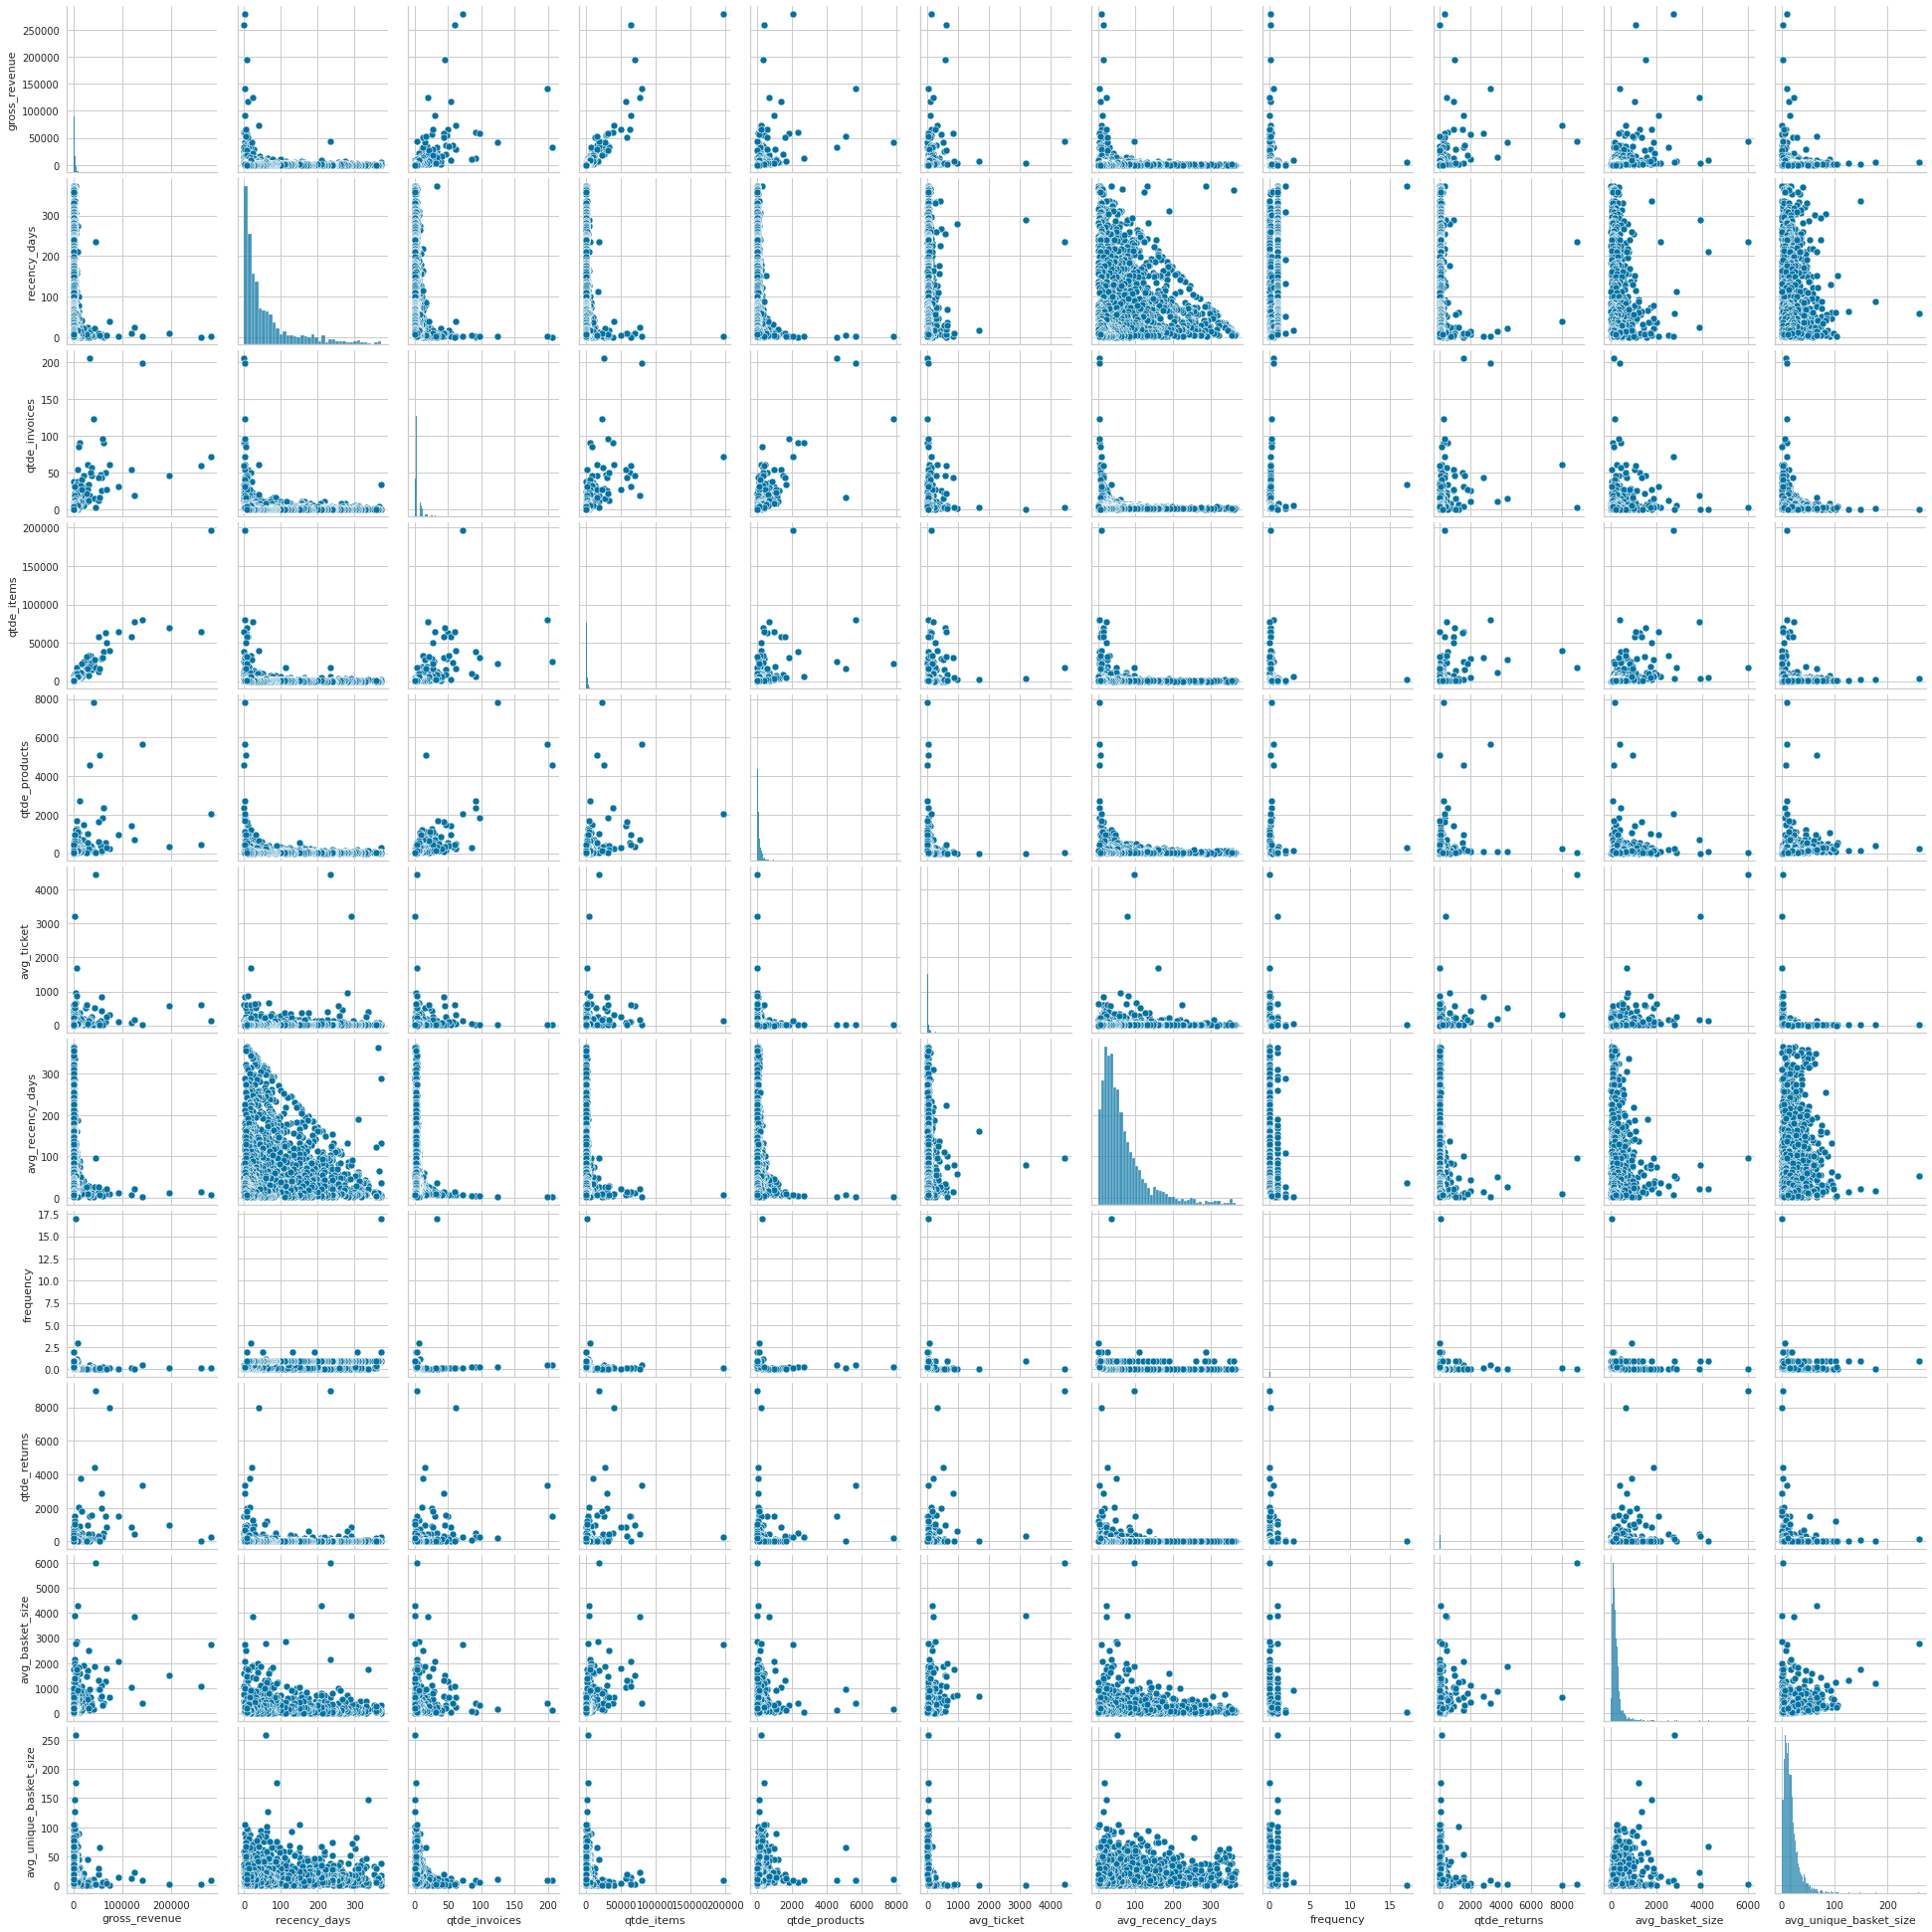

In [333]:
sns.pairplot(df42)

* Frequency and Avg Ticket both have low variance

## 4.3. Space Study

In [60]:
df4.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qtde_invoices',
       'qtde_items', 'qtde_products', 'avg_ticket', 'avg_recency_days',
       'frequency', 'qtde_returns', 'avg_basket_size',
       'avg_unique_basket_size'],
      dtype='object')

In [61]:
cols_selected = [ 'gross_revenue', 'recency_days','qtde_items', 'qtde_invoices', 'qtde_products', 'qtde_returns'] # qunt_items and qunt_invoices are correlated qith qtd_products
df43 = df4[cols_selected].copy()
df5_aux = df43

In [62]:
mm = pp.MinMaxScaler() # all distributions were assigned for minmax scaler for rescalling
# ss = pp.StandardScaler() -> check for normal distribution
# rs = pp.RobustScaler() -> check for outliers

df43['gross_revenue'] = mm.fit_transform(df43[['gross_revenue']])
df43['recency_days'] = mm.fit_transform(df43[['recency_days']])
df43['qtde_items'] = mm.fit_transform(df43[['qtde_items']])
df43['qtde_invoices'] = mm.fit_transform(df43[['qtde_invoices']])
df43['qtde_products'] = mm.fit_transform(df43[['qtde_products']])
# df43['avg_ticket'] = mm.fit_transform(df43[['avg_ticket']])
# df43['avg_recency_days'] = mm.fit_transform(df43[['avg_recency_days']])
# df43['frequency'] = mm.fit_transform(df43[['frequency']])
df43['qtde_returns'] = mm.fit_transform(df43[['qtde_returns']])
# df43['avg_basket_size'] = mm.fit_transform(df43[['avg_basket_size']])
# df43['avg_unique_basket_size'] = mm.fit_transform(df43[['avg_unique_basket_size']])

X = df43.copy()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Min:0.0 - Máx:1.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


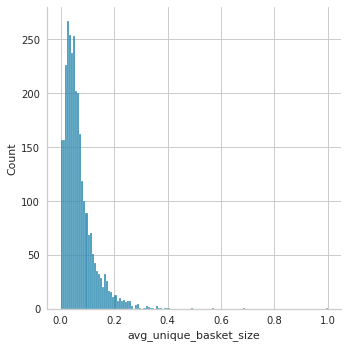

In [52]:
# data as it is
variable = 'avg_unique_basket_size'
print('Min:{} - Máx:{}'.format(df5_aux[variable].min(), df5_aux[variable].max()))
sns.displot(df5_aux[variable]);

Min:0.0 - Máx:1.0


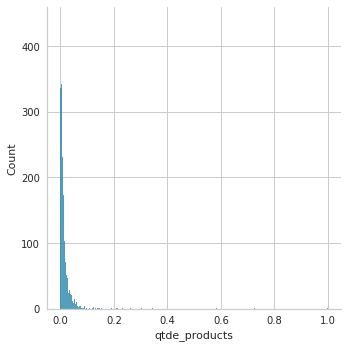

In [53]:
# data as it is
variable = 'qtde_products'
print('Min:{} - Máx:{}'.format(df43[variable].min(), df43[variable].max()))
sns.displot(df5_aux[variable]);

### 4.3.2. PCA

In [467]:
pca = dd.PCA(n_components=3)
principal_components = pca.fit_transform(X)

<BarContainer object of 3 artists>

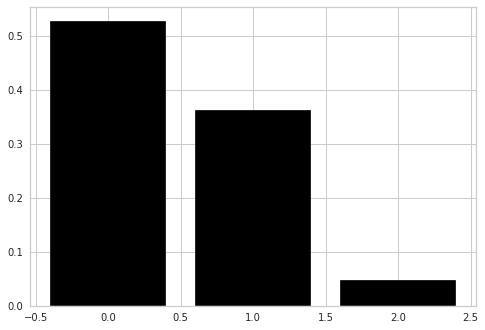

In [468]:
plt.bar(range(pca.n_components_) , pca.explained_variance_ratio_, color='black')

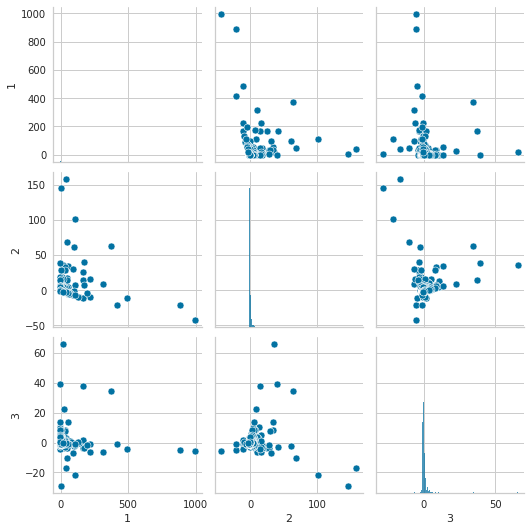

In [449]:
df_pca = pd.DataFrame(principal_components, columns=['1', '2', '3'])
sns.pairplot(df_pca)

In [410]:
fig = px.scatter_3d( df_pca, x='1', y='2', z='3')
fig.show()

In [486]:
pca = dd.PCA(n_components=2)
principal_components = pca.fit_transform(X)

<BarContainer object of 2 artists>

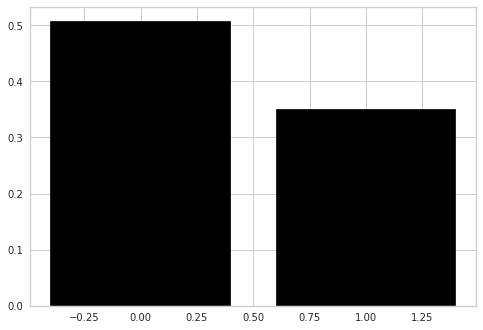

In [487]:
plt.bar(range(pca.n_components_) , pca.explained_variance_ratio_, color='black')

In [488]:
df_pca = pd.DataFrame(principal_components, columns = ['1', '2'])
df_pca

1         2
0     0.821004 -0.006876
1    -0.010080 -0.112927
2    -0.154390 -0.144755
3     0.074449  0.077795
4     0.735283 -0.078001
...        ...       ...
2967 -0.120356 -0.183516
2968 -0.129919 -0.190946
2969 -0.151750 -0.177328
2970 -0.127742 -0.194311
2971 -0.130691 -0.181410

[2972 rows x 2 columns]

<AxesSubplot:xlabel='1', ylabel='2'>

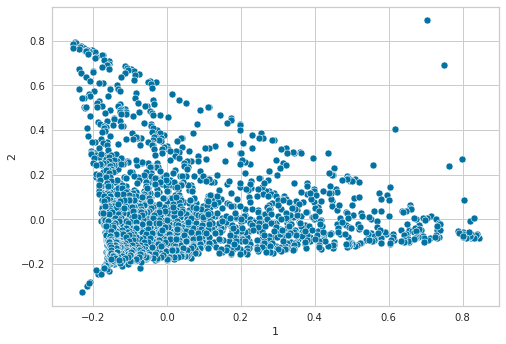

In [489]:
sns.scatterplot(data=df_pca, x='1', y='2')

### 4.3.3. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

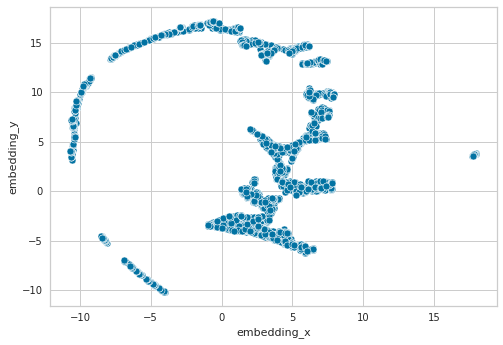

In [63]:
# dimensionality reducer - UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_umap = pd.DataFrame()
df_umap['embedding_x'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_umap)

### 4.3.4. t-SNE

/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

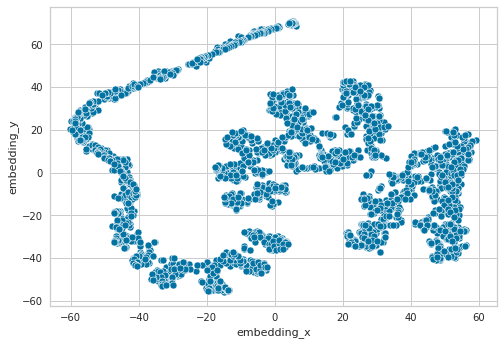

In [64]:
# dimensionality reducer - t-SNE
reducer = mn.TSNE(n_components=2, n_jobs=-1, random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_tsne = pd.DataFrame()
df_tsne['embedding_x'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]

# plot t-SNE
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tsne)

### 4.3.5. Tree-Based Embedding

* Article comparing Random forest and Extra-trees regressor for tree-based embedding - https://gdmarmerola.github.io/forest-embeddings/



In [65]:
# training dataset
X = df43.drop(['gross_revenue'], axis=1)
y = df43['gross_revenue'].copy()

# model definition
rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42)

# model training
rf_model.fit(X, y)

# leaf
df_leaf = pd.DataFrame(rf_model.apply(X))
df_leaf

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99
0     3187  3160  3335  3336  3032  3200  3144  3153  3195  3145  3160  3286  3148  3195  3137  3206  3112  3201  3119  3269  3198  3127  3188  3131  3342  3142  3132  3120  3130  3240  3322  3388  3154  3350  3154  3349  3420  3168  3102  3111  3264  3233  3219  3170  3189  3134  3155  3335  3407  3335  3206  3130  3100  3370  3326  3338  3175  3382  3261  3342  3425  3295  3190  3221  3215  3121  3323  3325  3156  3280  3358  3270  3298  3275  3147  3166  3365  3090  3235  3177  3049  3332  3361  3120  3315  3194  3355  3201  3114  3188  3148  3236  3113  3097  3438  3162  3135  3351  3382  3333
1     3135  2837  2918  2856  3016  3066  2869  2888  3055  3079  3087  2869  3050  3172  3016  2916  2797  2869  2789  2756  2900  2974  2799  3085  2963  3101  2897  3023  2776  3091  2820  2928  2940  2945  3032  2948  2955  2809  3038  2903  2918  2880  2992  3116  2986  2982  3102  2924  2931  2943  3152  3092  2982  2835  2987  3238  3076  2951  2883  2880  2978  2924  2817  2921  2857  2848  3022  2917  3086  2912  2985  2904  2876  2926  3019  2807  2925  2959  3190  3086  3039  2924  2935  2751  2924  3037  2920  3152  3054  2814  2884  2842  3081  2761  2992  2945  2890  2929  2964  2987
2     3610  3606  3594  3525  3571  3641  3551  3602  3555  3597  3588  3559  3588  3630  3584  3582  3604  3605  3529  3522  3519  3624  3615  3537  3528  3641  3556  3582  3517  3726  3454  3677  3623  3612  3586  3497  3550  3610  3592  3514  3631  3596  3677  3620  3618  3579  3574  3606  3650  3578  3603  3618  3615  3622  3642  3613  3618  3662  3583  3462  3624  3587  3576  3651  3536  3619  3644  3602  3584  3592  3566  3626  3582  3536  3599  3599  3579  3581  3576  3608  3537  3457  3631  3555  3556  3634  3615  3654  3562  3509  3585  3490  3560  3553  3632  3582  3582  3623  3483  3661
3     1570  2075  1583  1465  2008  1463  1509  1893  1408  1634  2040  2049  1517  1593  2048  1835  2118  1601  1839  1412  1723  2034  1537  1708  1551  2001  1437  1489  1680  1750  1422  1607  1424  1465  1292  1601  1907  2094  1643  1560  1522  1498  1533  1294  1563  1511  1517  1469   962  1686  1492  1579  1514  2192  2062  1524  1578  2099  1517  2033  1497  1531  2063  1583  1662  1437  2127  1728  1770  1446  2070  1575  1529  1994  1631  2075  1519  1505  1821  1827  1834  1485  1603  1421  2030  1400  1506  2118  1629  1563  1801  2029  2053  1475  1890  2087  1557  1809  1774  2126
4      199   236   127   108    20   207   150   204   147   176   200   118   167   823    69    70   197   235   148    48    72   186   104    50   201   213    52   332   120   146   168   164   184   333   139   233   243   183   203   589   219    74   319   214   174   165   194   213   161    27   181   437   362   179   201   199   137   168   155   587   111   187   193   198   201   109   208   240   207   199   237    29   236   217    28    31   224   126    53   183   158   329   129   161   592    71   217   193    86   687   127    54   535   190   150    30   190   177   127    25
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  

<AxesSubplot:xlabel='1', ylabel='2'>

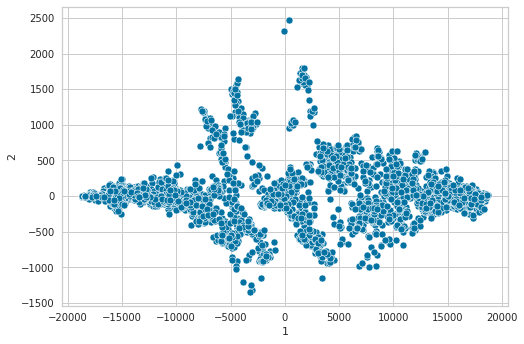

In [66]:
# dimensionality reducer - PCA
pca = dd.PCA(n_components=2)
principal_components = pca.fit_transform(df_leaf)

# embedding
df_pca = pd.DataFrame(principal_components, columns=['1', '2'])

# plot UMAP
sns.scatterplot(x='1', y='2', data=df_pca) 

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

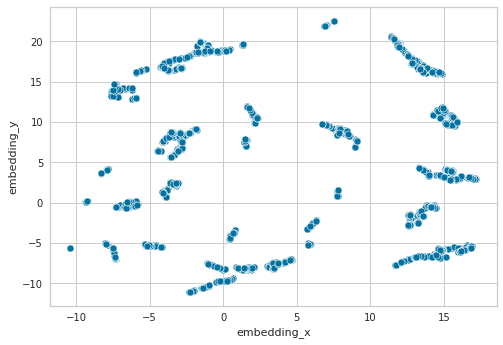

In [67]:
# dimensionality reducer - UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leaf)

# embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tree)

/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

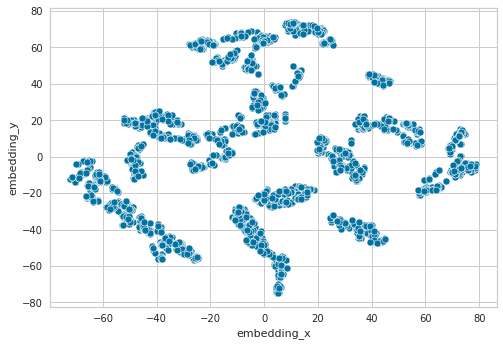

In [68]:
# dimensionality reducer - t-SNE
reducer = mn.TSNE(n_components=2, n_jobs=-1,random_state=42)
embedding = reducer.fit_transform(df_leaf)

# embedding
df_tree_2 = pd.DataFrame()
df_tree_2['embedding_x'] = embedding[:, 0]
df_tree_2['embedding_y'] = embedding[:, 1]

# plot t-SNE
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tree_2)

* Candidates for testing: 
    - Embedding + UMAP
    - Embedding + t-SNE

# 5. Data Preparation 

In [69]:
# df5 = df4.copy()

# 6. Feature Selection

In [70]:
# df6 = df5.copy()

# 7. Hyper Parameter Fine Tuning

## 7.1. Over UMAP Space

In [121]:
X = df_tree.copy()
X.head()

embedding_x  embedding_y
0     6.693180     9.763706
1    16.782055     3.189414
2    12.520246    18.340899
3    -7.364927    -6.838263
4    -1.715394    19.626394

In [70]:
clusters = np.arange(2, 25, 1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


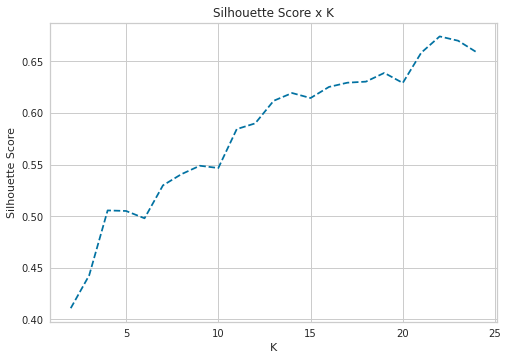

In [71]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model training
    kmeans.fit(X)
    
    # model predict
    labels = kmeans.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    kmeans_list.append(sil)    

plt.plot(clusters, kmeans_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## GMM

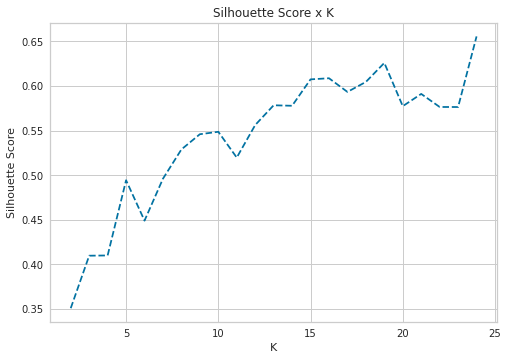

In [72]:
gmm_list = []
for k in clusters:
    # model definition
    gmm = mx.GaussianMixture(n_components=k, n_init=200, random_state=42)
    
    # model training
    gmm.fit(X)
    
    # model predict
    labels = gmm.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)    

plt.plot(clusters, gmm_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## Hierarchical Clustering

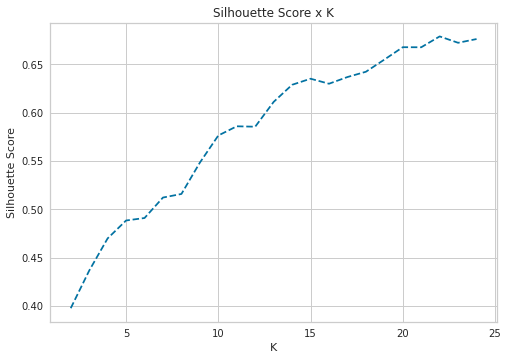

In [73]:
hc_list = []
for k in clusters:
    # model definition & training 
    hc_model = hc.linkage(X, 'ward')
    
    # model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')
    
    # metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)

plt.plot(clusters, hc_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## DBSCAN

In [74]:
eps=2.00
min_samples=20

# model definition
dbscan_model = c.DBSCAN(eps=eps, min_samples=min_samples)

# model training & prediction
labels = dbscan_model.fit_predict(X)

sil = m.silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: {}'.format(sil))
print('Number of Clusters: {}'.format(len(np.unique(labels))))
print(np.unique(labels))

Silhouette Score: 0.6475750207901001
Number of Clusters: 21
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


### Results

In [75]:
cm = sns.light_palette('blue', as_cmap=True)
df_results = pd.DataFrame({'KMeans':kmeans_list, 'GMM':gmm_list, 'HClustering':hc_list}).T
df_results.style.background_gradient(cmap=cm, axis=0)

In [76]:
cm = sns.light_palette('blue', as_cmap=True)
df_results = pd.DataFrame({'KMeans':kmeans_list, 'GMM':gmm_list, 'HClustering':hc_list}).T.loc[:, 6:13]
df_results.style.background_gradient(cmap=cm, axis=0)

## 7.1. Silhouette Analysis

In [507]:
# fig, ax = plt.subplots(3,2, figsize=(20,20))
# 
# for k in clusters:
#     km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(k, 2)
#     
#     visualizer = yellowbrick.cluster.SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(X)
#     visualizer.finalize()

# 8. Modelling and Cluster Analysis

In [122]:
# model definition & training 
hc_model = hc.linkage(X, 'ward')
    
# model predict
labels = hc.fcluster(hc_model, 11, criterion='maxclust')

X['clusters'] = labels

X.head()

embedding_x  embedding_y  clusters
0     6.693180     9.763706        11
1    16.782055     3.189414         9
2    12.520246    18.340899         8
3    -7.364927    -6.838263         4
4    -1.715394    19.626394         7

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

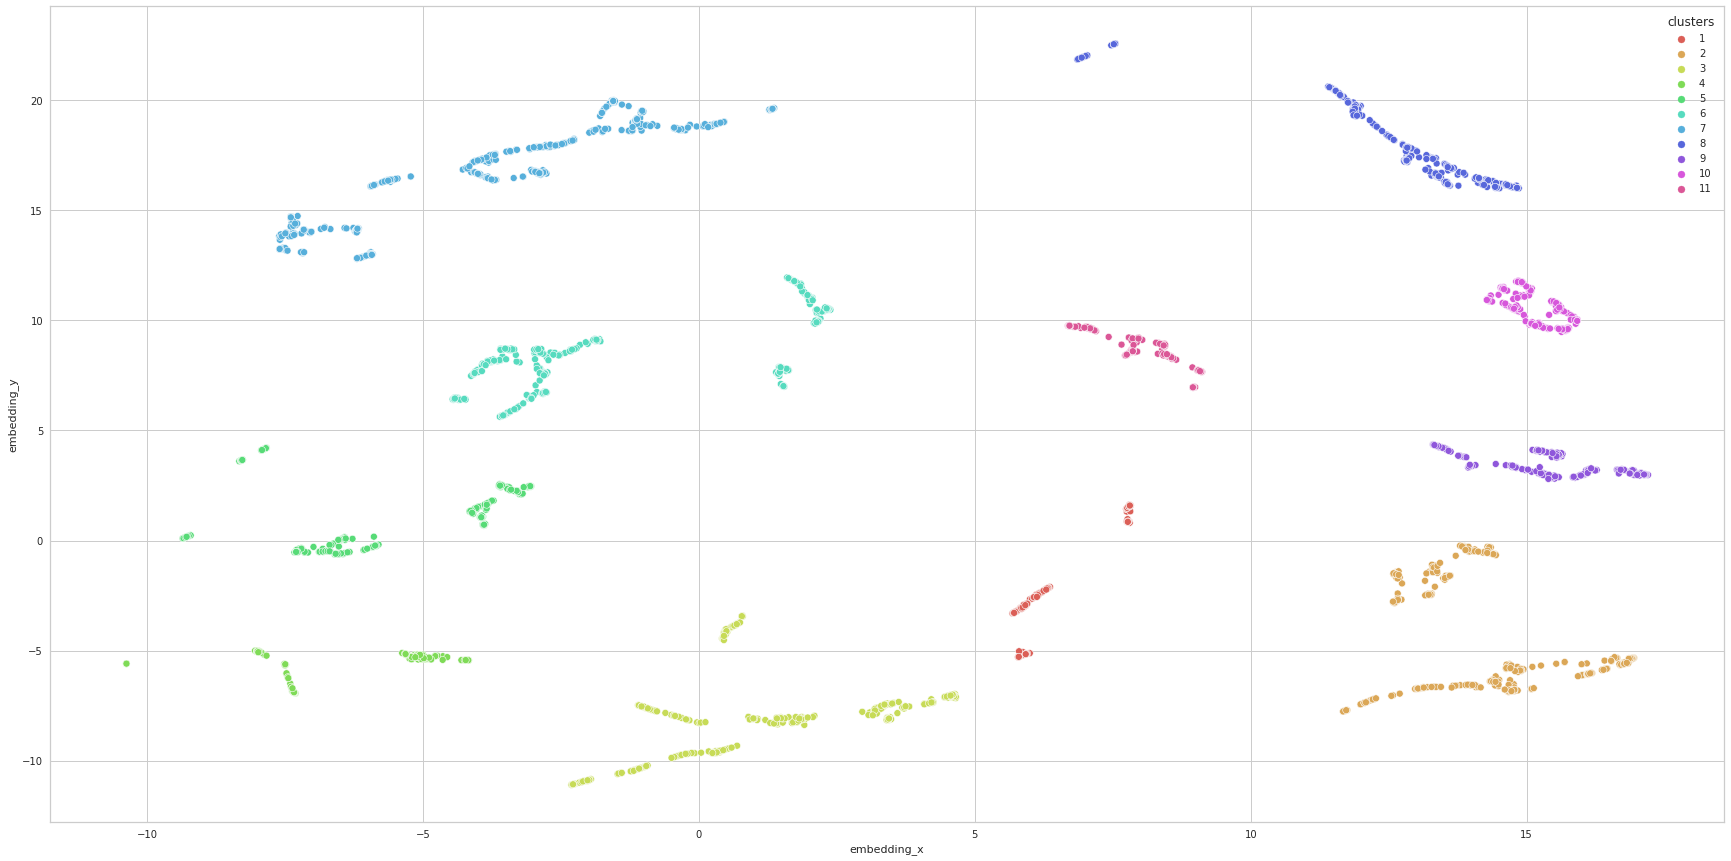

In [123]:
plt.figure(figsize=(30, 15))
sns.scatterplot(x='embedding_x', y='embedding_y', hue='clusters',palette=sns.color_palette('hls', n_colors=len(X['clusters'].unique())), data=X)

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

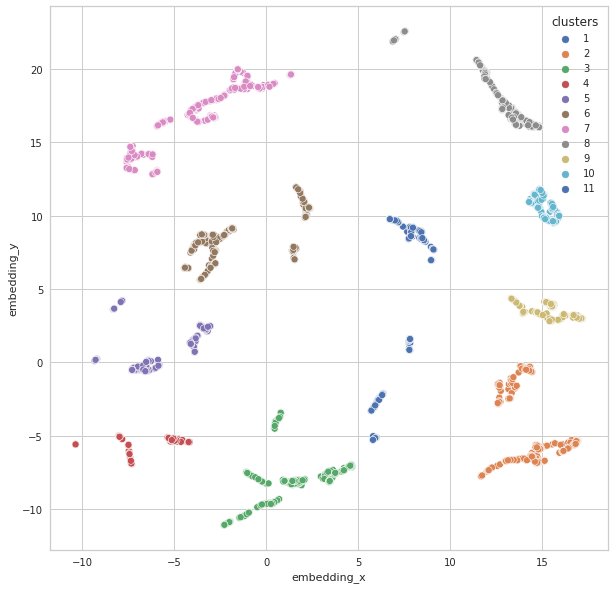

In [124]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='embedding_x', y='embedding_y', hue='clusters',palette='deep', data=X)

### Comparing UMAP before and after forest embedding

In [126]:
# model definition & training 
hc_model = hc.linkage(df_umap, 'ward')
    
# model predict
labels = hc.fcluster(hc_model, 6, criterion='maxclust')
    
# plot
df_umap['labels'] = labels

df_umap

embedding_x  embedding_y  labels
0       17.837790     3.689380       4
1        4.728441    14.084366       1
2        1.273083    -3.704107       6
3       -1.869391    16.426497       3
4       -4.010643   -10.218374       5
...           ...          ...     ...
2967     1.747271     0.234374       6
2968     1.777220    -0.545960       6
2969     2.576233    -2.829867       6
2970     3.057840    -1.146520       6
2971     1.713911    -0.121195       6

[2972 rows x 3 columns]

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

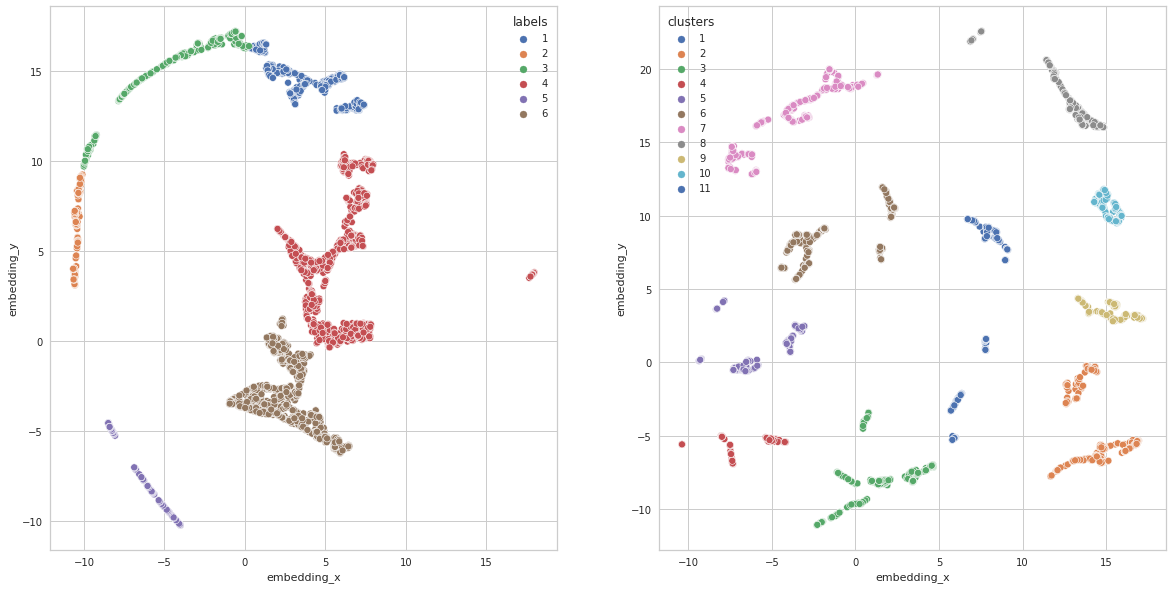

In [132]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.scatterplot(x='embedding_x', y='embedding_y', hue='labels', palette='deep', data=df_umap)

# plot UMAP
plt.subplot(1,2,2)
sns.scatterplot(x='embedding_x', y='embedding_y', hue='clusters', palette='deep', data=X)

In [79]:
df8 = df4.copy()
df8['cluster'] = labels
df8.head()

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size  cluster
0        17850        5391.21         372.0           34.0      1733.0          297.0   18.152222         35.500000  17.000000          40.0        50.970588                0.617647       11
1        13047        3232.59          56.0            9.0      1390.0          171.0   18.904035         27.250000   0.028302          35.0       154.444444               11.666667        9
2        12583        6705.38           2.0           15.0      5028.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000        8
3        13748         948.25          95.0            5.0       439.0           28.0   33.866071         92.666667   0.017921           0.0        87.800000                4.800000        4
4        15100         876.00         333.0            3.0        80.0            3.0  292.000000          8.600000   0.073171          22.0        26.666667                0.333333        7

In [80]:
# Number of Customers for Cluster and Percentage by Cluster
df_cluster = df8[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(np.round(df_cluster['customer_id'] / df_cluster['customer_id'].sum(), decimals=5))

### Average Gross Revenue
df_avg_gross_revenue = df8[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_gross_revenue, decimals=2), how='inner', on='cluster')

### Average Recency Days
df_avg_recency_revenue = df8[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_recency_revenue, decimals=2), how='inner', on='cluster')

### Average Invoice N°
df_products = df8[['qtde_products', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_products, decimals=2), how='inner', on='cluster')

# frequency
df_frequency = df8[['frequency', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_frequency, decimals=2), how='inner', on='cluster')

# returns
df_returns = df8[['qtde_returns', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_returns, decimals=2), how='inner', on='cluster')

df_cluster.sort_values('gross_revenue', ascending=False)

cluster  customer_id  perc_customer  gross_revenue  recency_days  qtde_products  frequency  qtde_returns
7         8          293          9.859       15048.58         21.80         435.73       0.08        225.71
9        10          175          5.888        3899.69         27.15         228.32       0.04         36.35
10       11          158          5.316        2896.79         37.39         172.13       0.14         29.16
8         9          206          6.931        2354.41         43.12         153.13       0.04         18.03
1         2          392         13.190        1780.19         34.06         122.03       0.03         22.15
0         1          133          4.475        1460.07         65.55          87.30       0.06         17.65
2         3          381         12.820        1052.96         66.10          72.58       0.07         12.61
3         4          142          4.778         937.87         62.68          74.34       0.03          6.27
4         5          242          8.143         708.58         81.48          54.10       0.12          5.23
5         6          379         12.752         546.94         88.92          44.94       0.15          5.79
6         7          471         15.848         335.49        118.69          22.05       0.29          5.41

In [ ]:
8 Cluster 'insiders'       > 1° place gross_revenue, by cluster
10 Cluster 'more products'  > 2° place gross_revenue, by cluster
5 Cluster 'spend more'
11 Cluster 'middle revenue group / encrease frequency'
9 Cluster 'more products 2'
2 Cluster 'need lower recency'
1 Cluster 'need lower recenvy 2'
3 Cluster 'need lower recency 3'

### Cluster 8 (Fidelity Program):
    - N° of customers: 293
    - Average Gross Revenue: 15048.58 dolars
    - Average Recency: 21.80 days
    - Average N° of Products: 435.73
    - Average Frequency: 0.08 product/day
    - Average Returns: 225.71 
    
### Cluster 10: 
    - N° of customers: 175
    - Average Gross Revenue: 3899.69 dolars
    - Average Recency: 27.15 days
    - Average N° of Products: 228.32
    - Average Frequency: 0.04 product/day
    - Average Returns: 36.35 

## 7.2. Over t-SNE Space

In [136]:
X = df_tree_2.copy()
X.head()

embedding_x  embedding_y
0    24.654205   -33.860477
1    35.403984    -8.175735
2    -0.037807   -51.876595
3    13.280991    44.855686
4   -40.996548   -51.972664

In [91]:
clusters = np.arange(2, 25, 1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

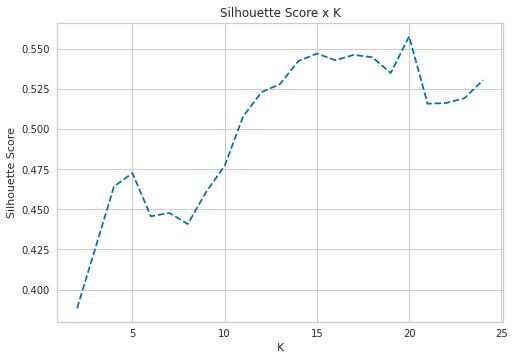

In [92]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model training
    kmeans.fit(X)
    
    # model predict
    labels = kmeans.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    kmeans_list.append(sil)    

plt.plot(clusters, kmeans_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## GMM

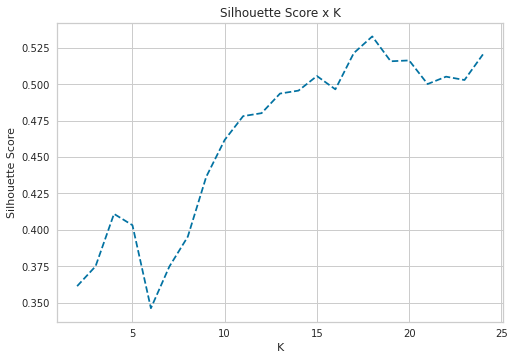

In [93]:
gmm_list = []
for k in clusters:
    # model definition
    gmm = mx.GaussianMixture(n_components=k, n_init=100, random_state=42)
    
    # model training
    gmm.fit(X)
    
    # model predict
    labels = gmm.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)    

plt.plot(clusters, gmm_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## Hierarchical Clustering

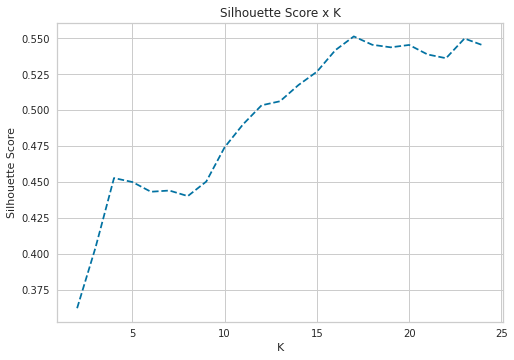

In [94]:
hc_list = []
for k in clusters:
    # model definition & training 
    hc_model = hc.linkage(X, 'ward')
    
    # model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')
    
    # metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)

plt.plot(clusters, hc_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## DBSCAN

In [112]:
eps=4.00
min_samples=20

# model definition
dbscan_model = c.DBSCAN(eps=eps, min_samples=min_samples)

# model training & prediction
labels = dbscan_model.fit_predict(X)

sil = m.silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: {}'.format(sil))
print('Number of Clusters: {}'.format(len(np.unique(labels))))
print(np.unique(labels))

Silhouette Score: 0.5401610136032104
Number of Clusters: 28
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26]


### Results

In [113]:
cm = sns.light_palette('blue', as_cmap=True)
df_results = pd.DataFrame({'KMeans':kmeans_list, 'GMM':gmm_list, 'HClustering':hc_list}).T
df_results.style.background_gradient(cmap=cm, axis=0)

In [114]:
cm = sns.light_palette('blue', as_cmap=True)
df_results = pd.DataFrame({'KMeans':kmeans_list, 'GMM':gmm_list, 'HClustering':hc_list}).T.loc[:, 6:13]
df_results.style.background_gradient(cmap=cm, axis=0)

## 7.1. Silhouette Analysis

In [507]:
# fig, ax = plt.subplots(3,2, figsize=(20,20))
# 
# for k in clusters:
#     km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(k, 2)
#     
#     visualizer = yellowbrick.cluster.SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(X)
#     visualizer.finalize()

# 8. Modelling and Cluster Analysis

In [137]:
# model definition
kmeans = c.KMeans(init='random', n_clusters=10, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(X)
    
# model predict
labels = kmeans.predict(X)

X['clusters'] = labels

X.head()

embedding_x  embedding_y  clusters
0    24.654205   -33.860477         6
1    35.403984    -8.175735         4
2    -0.037807   -51.876595         8
3    13.280991    44.855686         3
4   -40.996548   -51.972664         5

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

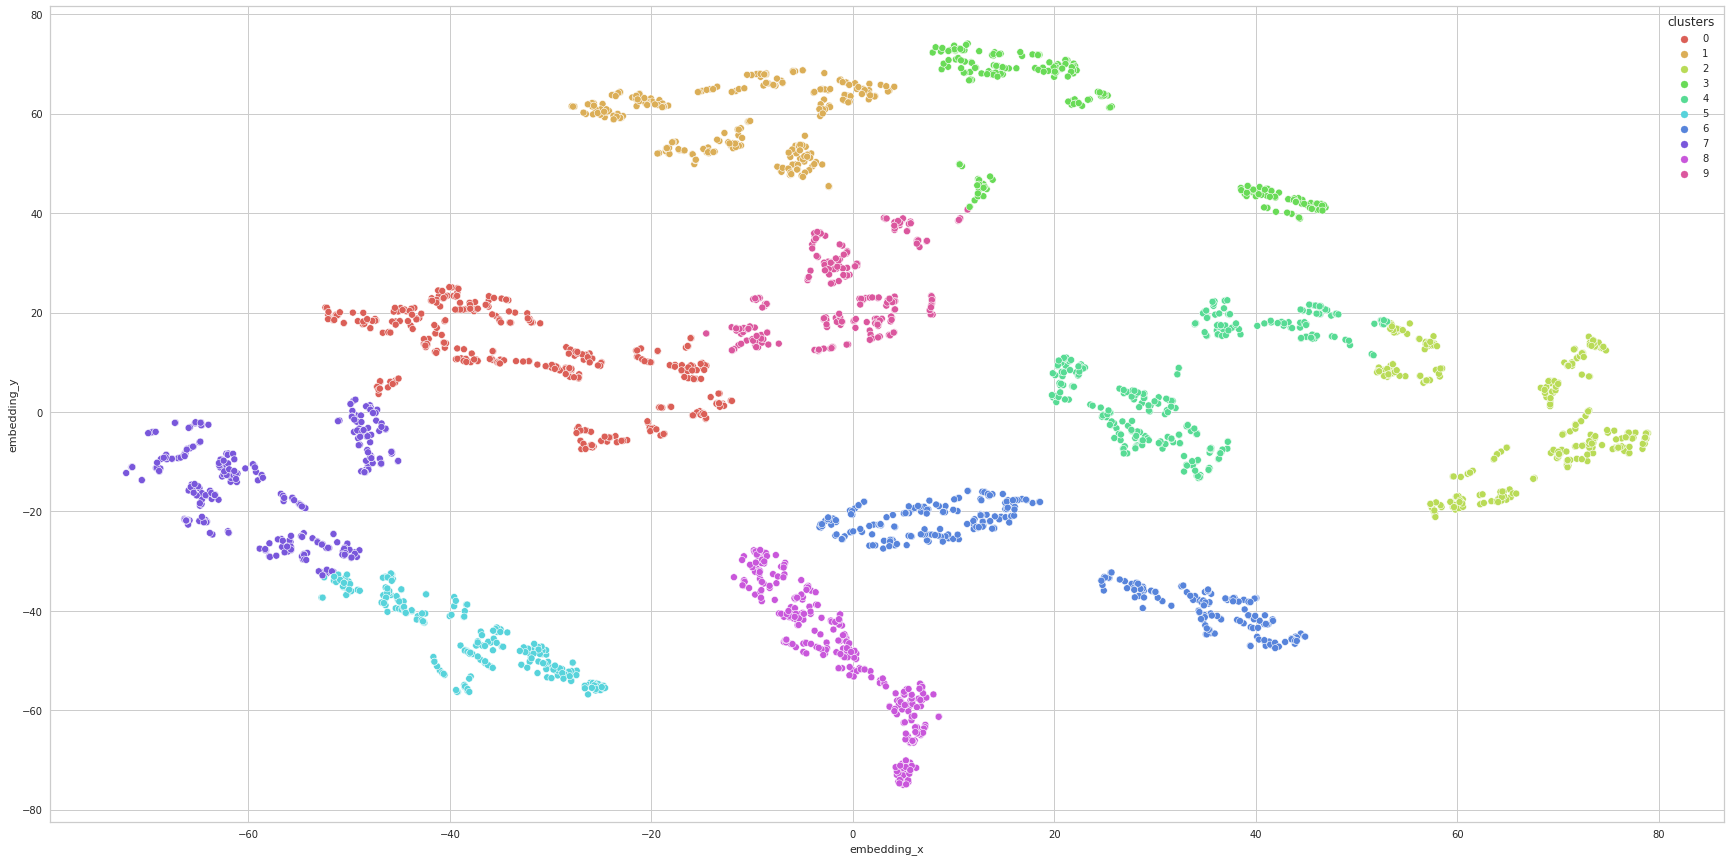

In [138]:
plt.figure(figsize=(30, 15))
sns.scatterplot(x='embedding_x', y='embedding_y', hue='clusters',palette=sns.color_palette('hls', n_colors=len(X['clusters'].unique())), data=X)

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

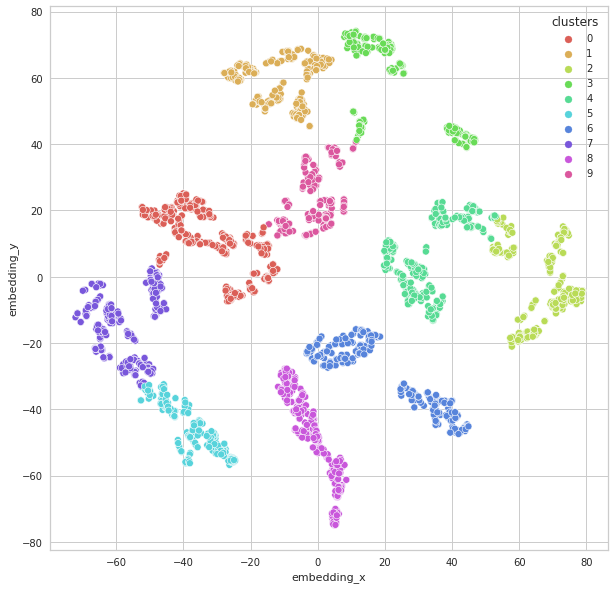

In [139]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='embedding_x', y='embedding_y', hue='clusters',palette=sns.color_palette('hls', n_colors=len(X['clusters'].unique())), data=X)

In [144]:
# model definition
kmeans = c.KMeans(init='random', n_clusters=8, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(df_tsne)
    
# model predict
labels = kmeans.predict(df_tsne)

df_tsne['labels'] = labels

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

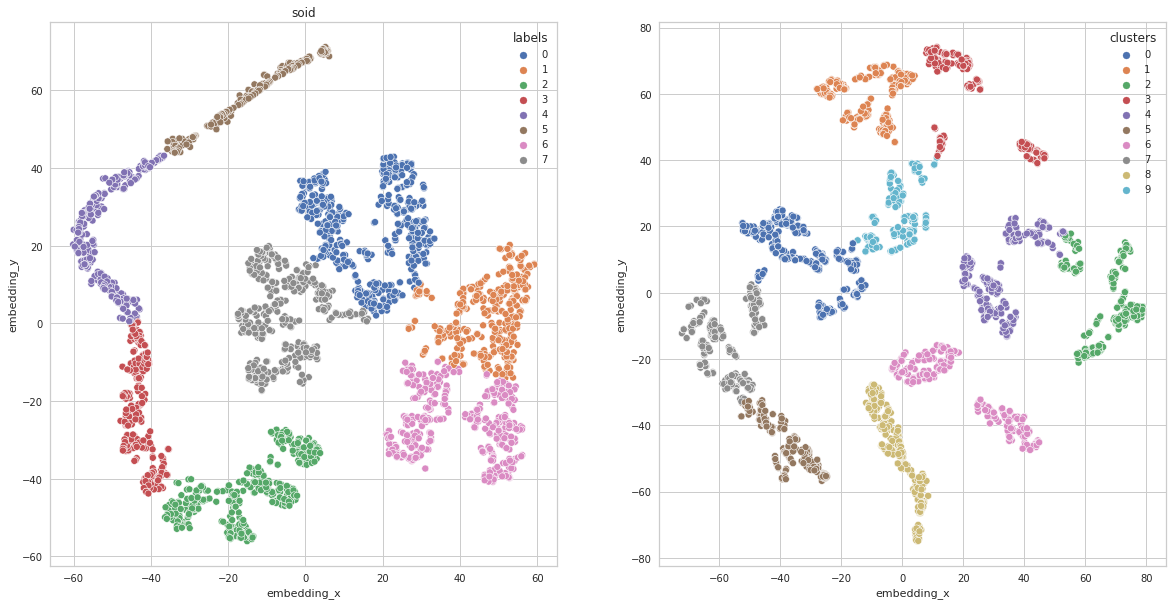

In [146]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.scatterplot(x='embedding_x', y='embedding_y', hue='labels', palette='deep', data=df_tsne)
plt.title('t-SNE')

# plot UMAP
plt.subplot(1,2,2)
sns.scatterplot(x='embedding_x', y='embedding_y', hue='clusters', palette='deep', data=X)
plt.title('Forest Embe')

In [140]:
df8 = df4.copy()
df8['cluster'] = labels
df8.head()

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size  cluster
0        17850        5391.21         372.0           34.0      1733.0          297.0   18.152222         35.500000  17.000000          40.0        50.970588                0.617647        6
1        13047        3232.59          56.0            9.0      1390.0          171.0   18.904035         27.250000   0.028302          35.0       154.444444               11.666667        4
2        12583        6705.38           2.0           15.0      5028.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000        8
3        13748         948.25          95.0            5.0       439.0           28.0   33.866071         92.666667   0.017921           0.0        87.800000                4.800000        3
4        15100         876.00         333.0            3.0        80.0            3.0  292.000000          8.600000   0.073171          22.0        26.666667                0.333333        5

In [141]:
# Number of Customers for Cluster and Percentage by Cluster
df_cluster = df8[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(np.round(df_cluster['customer_id'] / df_cluster['customer_id'].sum(), decimals=5))

### Average Gross Revenue
df_avg_gross_revenue = df8[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_gross_revenue, decimals=2), how='inner', on='cluster')

### Average Recency Days
df_avg_recency_revenue = df8[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_recency_revenue, decimals=2), how='inner', on='cluster')

### Average Invoice N°
df_products = df8[['qtde_products', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_products, decimals=2), how='inner', on='cluster')

# frequency
df_frequency = df8[['frequency', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_frequency, decimals=2), how='inner', on='cluster')

# returns
df_returns = df8[['qtde_returns', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_returns, decimals=2), how='inner', on='cluster')

df_cluster.sort_values('gross_revenue', ascending=False)

cluster  customer_id  perc_customer  gross_revenue  recency_days  qtde_products  frequency  qtde_returns
8        8          293          9.859       15048.58         21.80         435.73       0.08        225.71
6        6          333         11.205        3423.84         32.01         201.66       0.09         32.94
4        4          328         11.036        2272.15         38.60         149.02       0.04         20.02
2        2          310         10.431        1625.71         38.26         109.76       0.03         21.57
3        3          236          7.941        1257.02         62.62          87.13       0.06         11.60
1        1          275          9.253         992.07         67.51          68.64       0.07         13.45
9        9          259          8.715         786.83         76.43          57.00       0.09          6.81
0        0          385         12.954         599.76         86.25          50.04       0.14          5.19
7        7          320         10.767         420.94        103.33          32.23       0.19          4.66
5        5          233          7.840         257.79        130.57          12.97       0.36          6.45

In [ ]:
8 Cluster 'insiders'       > 1° place gross_revenue, by cluster
6 Cluster 'higher frequency'  > 2° place gross_revenue, by cluster
4 Cluster 
2 Cluster 
3 Cluster 
1 Cluster 
9 Cluster 
0 Cluster 

### Cluster 8 (Fidelity Program):
    - N° of customers: 293
    - Average Gross Revenue: 15048.58 dolars
    - Average Recency: 21.80 days
    - Average N° of Products: 435.73
    - Average Frequency: 0.08 product/day
    - Average Returns: 225.71 
    
### Cluster 6: 
    - N° of customers: 333
    - Average Gross Revenue: 3423.84 dolars
    - Average Recency: 32.01 days
    - Average N° of Products: 201.66
    - Average Frequency: 0.09 product/day
    - Average Returns: 32.94

# 9. EDA (Exploratory Data Analysis) and Hypothesis Mindmap

In [82]:
# dataset unique to insiders group = cluster > 3
df9 = df8.loc[(df8['cluster']==8) | (df8['cluster']==10)]
df9.head()

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size  cluster
2        12583        6705.38           2.0           15.0      5028.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000        8
5        15291        4623.30          25.0           14.0      2102.0          102.0   45.326471         23.200000   0.040115          29.0       150.142857                4.357143       10
6        14688        5630.87           7.0           21.0      3621.0          327.0   17.219786         18.300000   0.057221         399.0       172.428571                7.047619        8
7        17809        5411.91          16.0           12.0      2057.0           61.0   88.719836         35.700000   0.033520          41.0       171.416667                3.833333       10
8        15311       60767.90           0.0           91.0     38194.0         2379.0   25.543464          4.144444   0.243316         474.0       419.714286                6.230769        8

## 9.1. Univariate Analysis

attributes           min            max          range          mean        median           std       skew    kurtosis
0              customer_id  12347.000000   18272.000000    5925.000000  15073.025641  14956.500000   1783.024175   0.146700   -1.259386
1            gross_revenue    343.230000  279138.020000  278794.790000  10879.657393   5330.350000  23817.971466   7.564577   69.716063
2             recency_days      0.000000     290.000000     290.000000     23.803419     10.000000     38.288879   3.744626   17.537379
3            qtde_invoices      1.000000     206.000000     205.000000     15.544872     11.000000     18.404295   5.846635   49.031055
4               qtde_items   1994.000000  196844.000000  194850.000000   6542.641026   3306.500000  13260.673848   8.309549   97.474062
5            qtde_products      1.000000    7838.000000    7837.000000    358.175214    232.500000    600.666513   7.807405   76.990816
6               avg_ticket      3.160579    4453.430000    4450.269421     73.183276     21.809832    279.101587  11.922921  165.034134
7         avg_recency_days      1.000000     219.000000     218.000000     34.664714     26.000000     28.107087   2.590146    9.570963
8                frequency      0.008427       3.000000       2.991573      0.066514      0.039716      0.170947  12.525776  193.710727
9             qtde_returns      0.000000    9014.000000    9014.000000    154.901709     14.000000    687.246618   9.176140  100.268411
10         avg_basket_size     37.945455    6009.333333    5971.387879    498.780710    331.822050    564.493061   4.580806   29.983656
11  avg_unique_basket_size      0.250000     259.000000     258.750000     17.557597     12.309829     20.571980   5.203959   47.939564
12                 cluster      8.000000      10.000000       2.000000      8.747863      8.000000      0.967692   0.522787   -1.734123

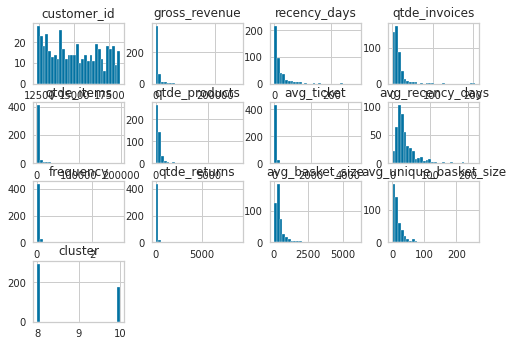

In [83]:
num_analysis(df9)

## 9.2. Bivariate Analysis

<AxesSubplot:xlabel='gross_revenue', ylabel='recency_days'>

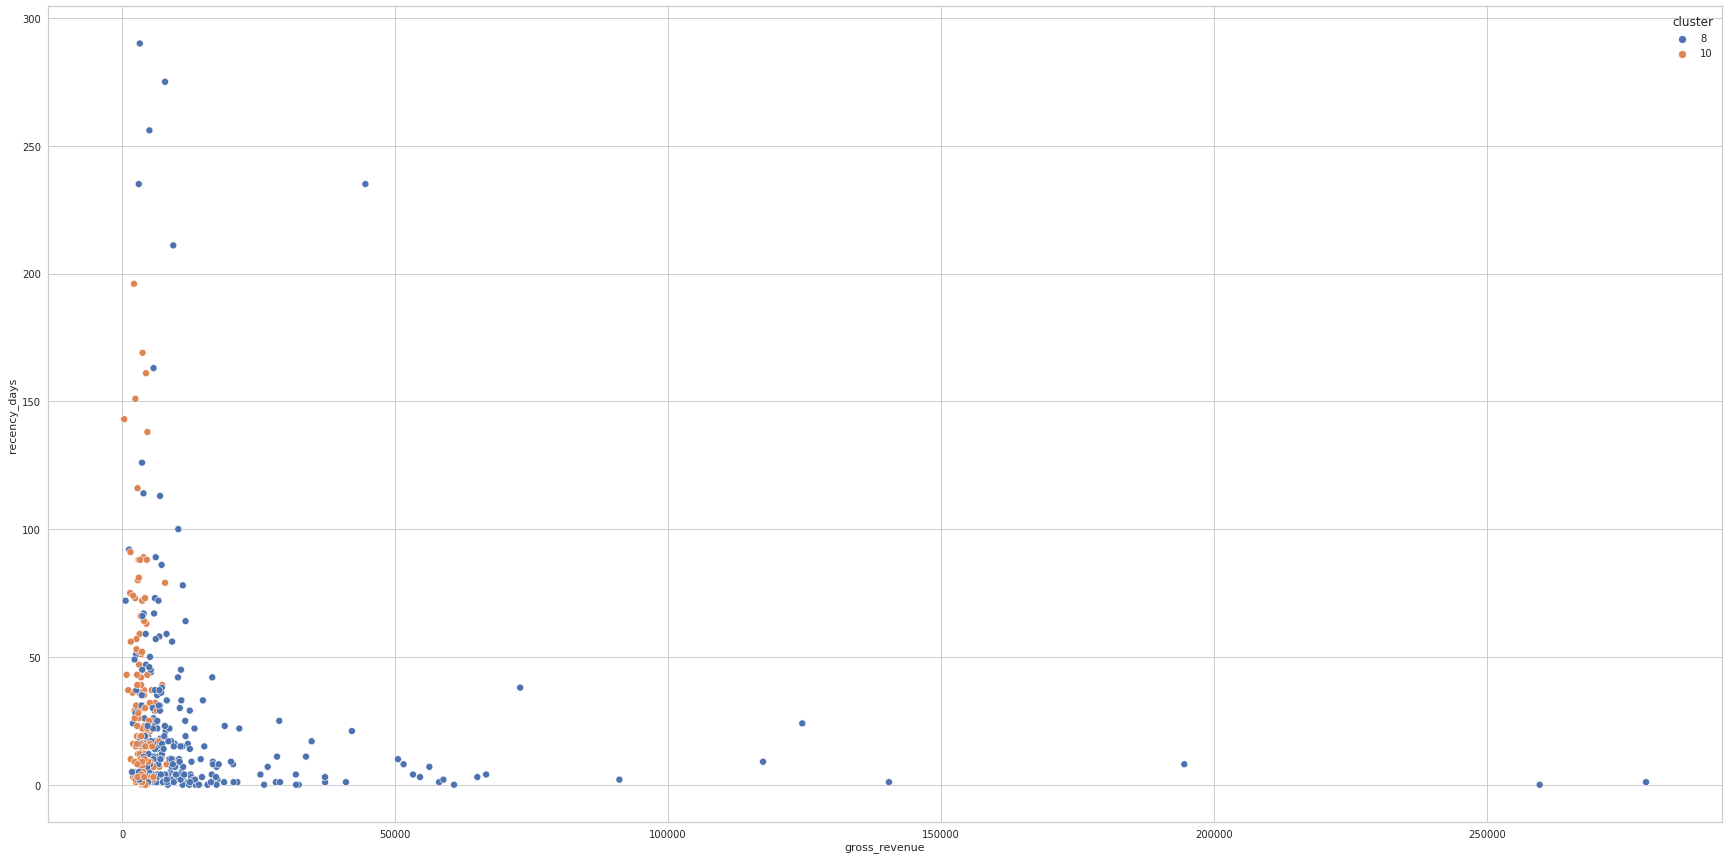

In [84]:
plt.figure(figsize=(30,15))
sns.scatterplot(x='gross_revenue', y='recency_days', hue='cluster', data=df9, palette='deep')

<AxesSubplot:xlabel='gross_revenue', ylabel='qtde_invoices'>

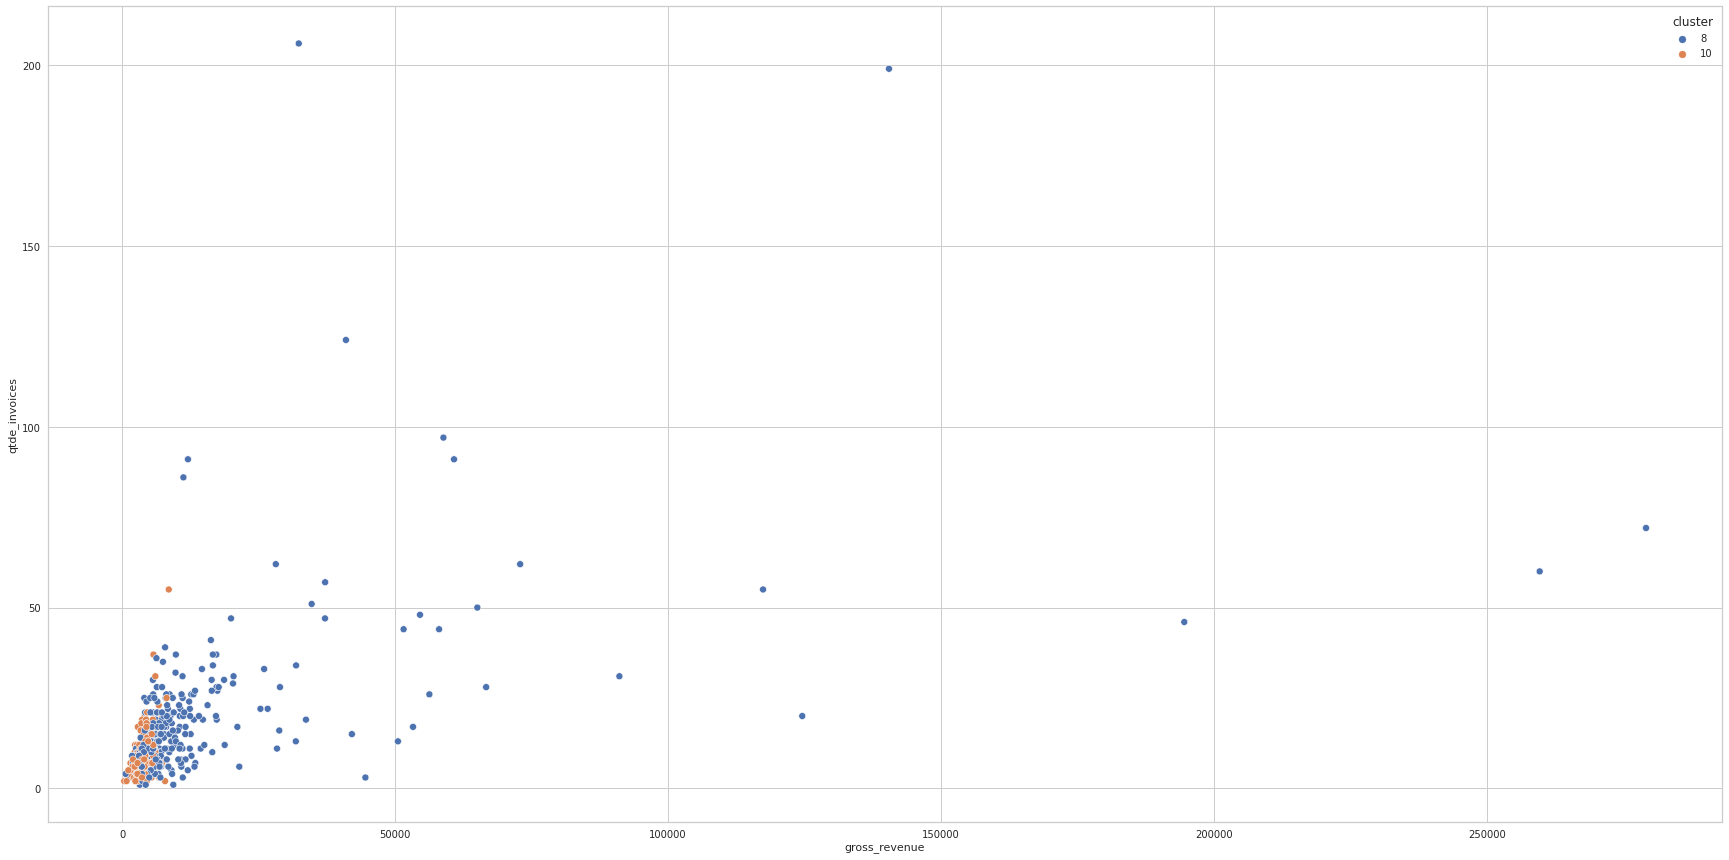

In [85]:
plt.figure(figsize=(30,15))
sns.scatterplot(x='gross_revenue', y='qtde_invoices', hue='cluster', data=df9, palette='deep')

<AxesSubplot:xlabel='gross_revenue', ylabel='qtde_items'>

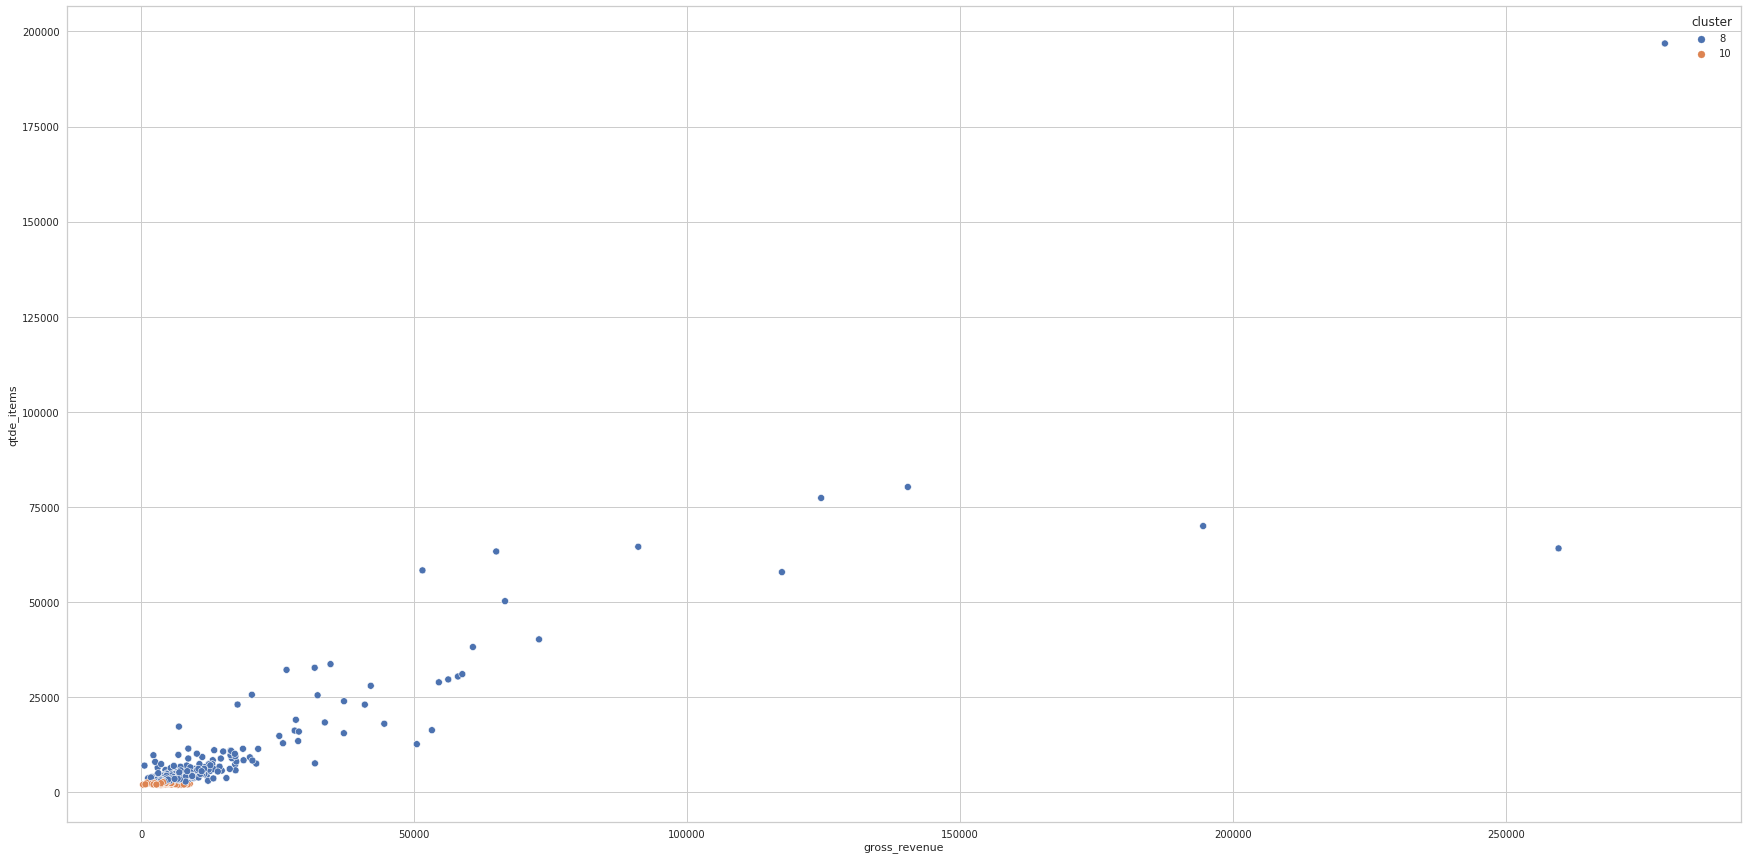

In [86]:
plt.figure(figsize=(30,15))
sns.scatterplot(x='gross_revenue', y='qtde_items', hue='cluster', data=df9, palette='deep')

<AxesSubplot:xlabel='gross_revenue', ylabel='qtde_products'>

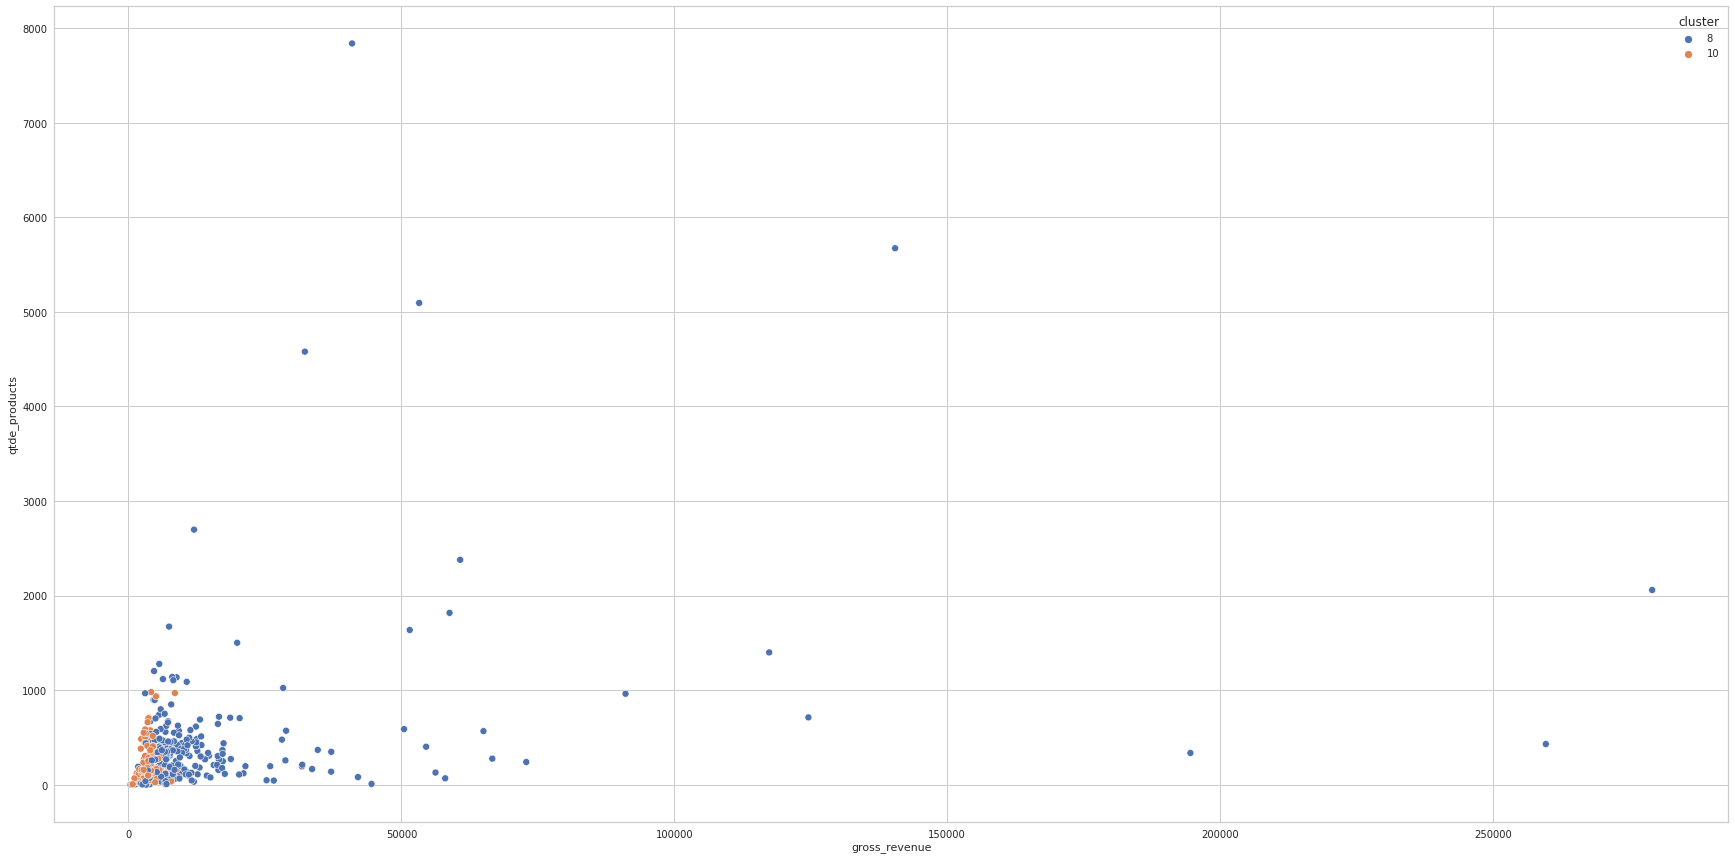

In [87]:
plt.figure(figsize=(30,15))
sns.scatterplot(x='gross_revenue', y='qtde_products', hue='cluster', data=df9, palette='deep')

<AxesSubplot:xlabel='gross_revenue', ylabel='frequency'>

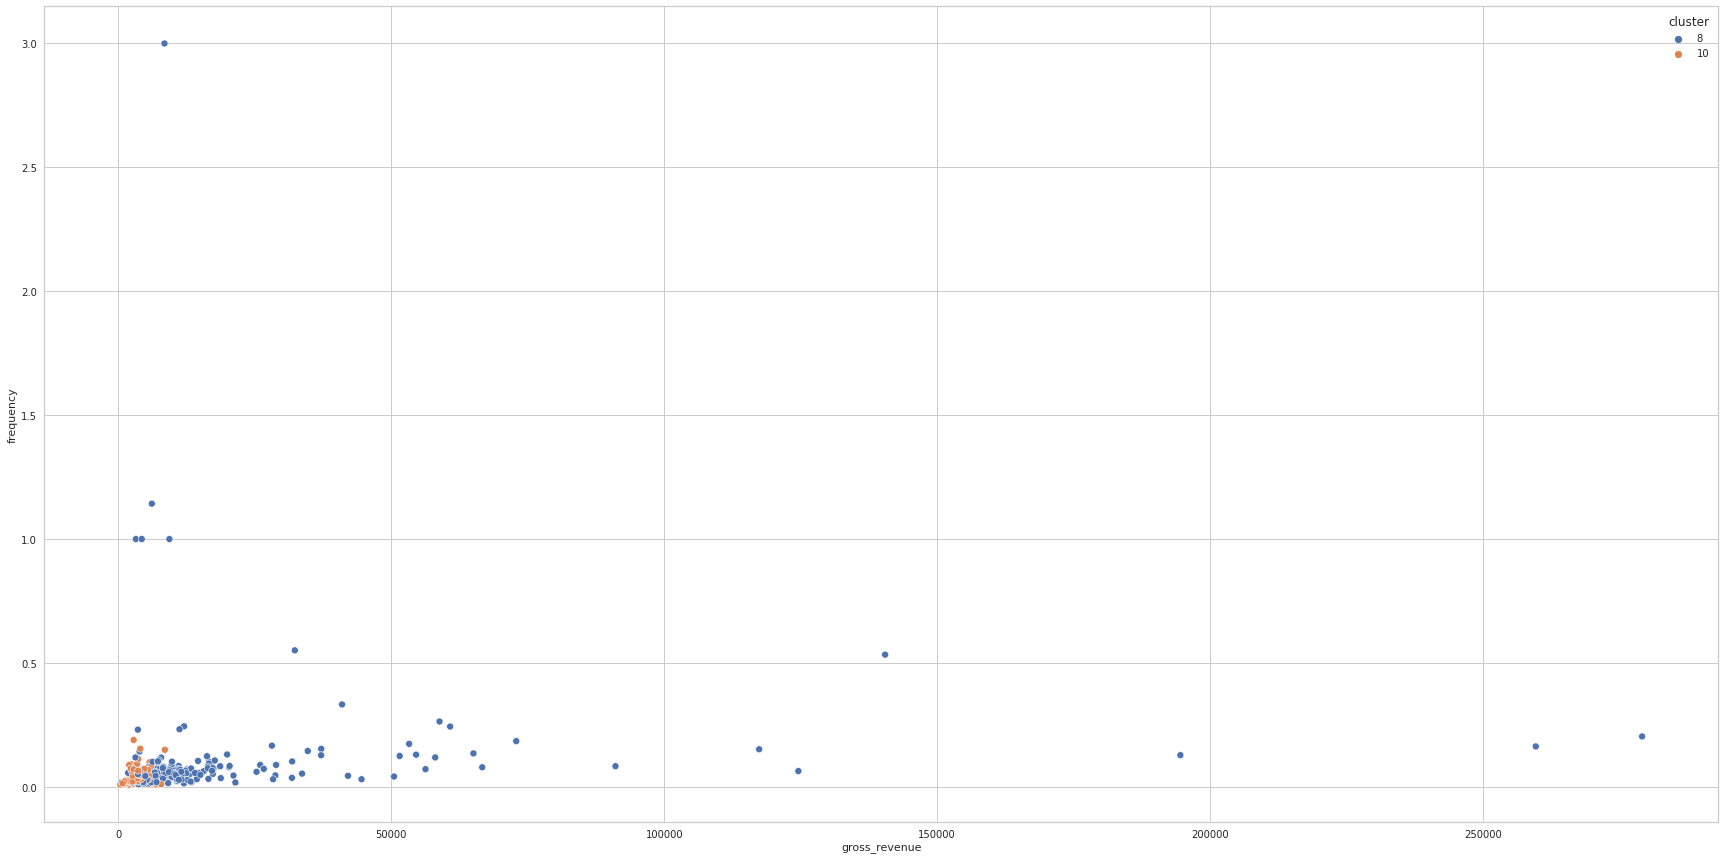

In [88]:
plt.figure(figsize=(30,15))
sns.scatterplot(x='gross_revenue', y='frequency', hue='cluster', data=df9, palette='deep')

<AxesSubplot:xlabel='gross_revenue', ylabel='qtde_returns'>

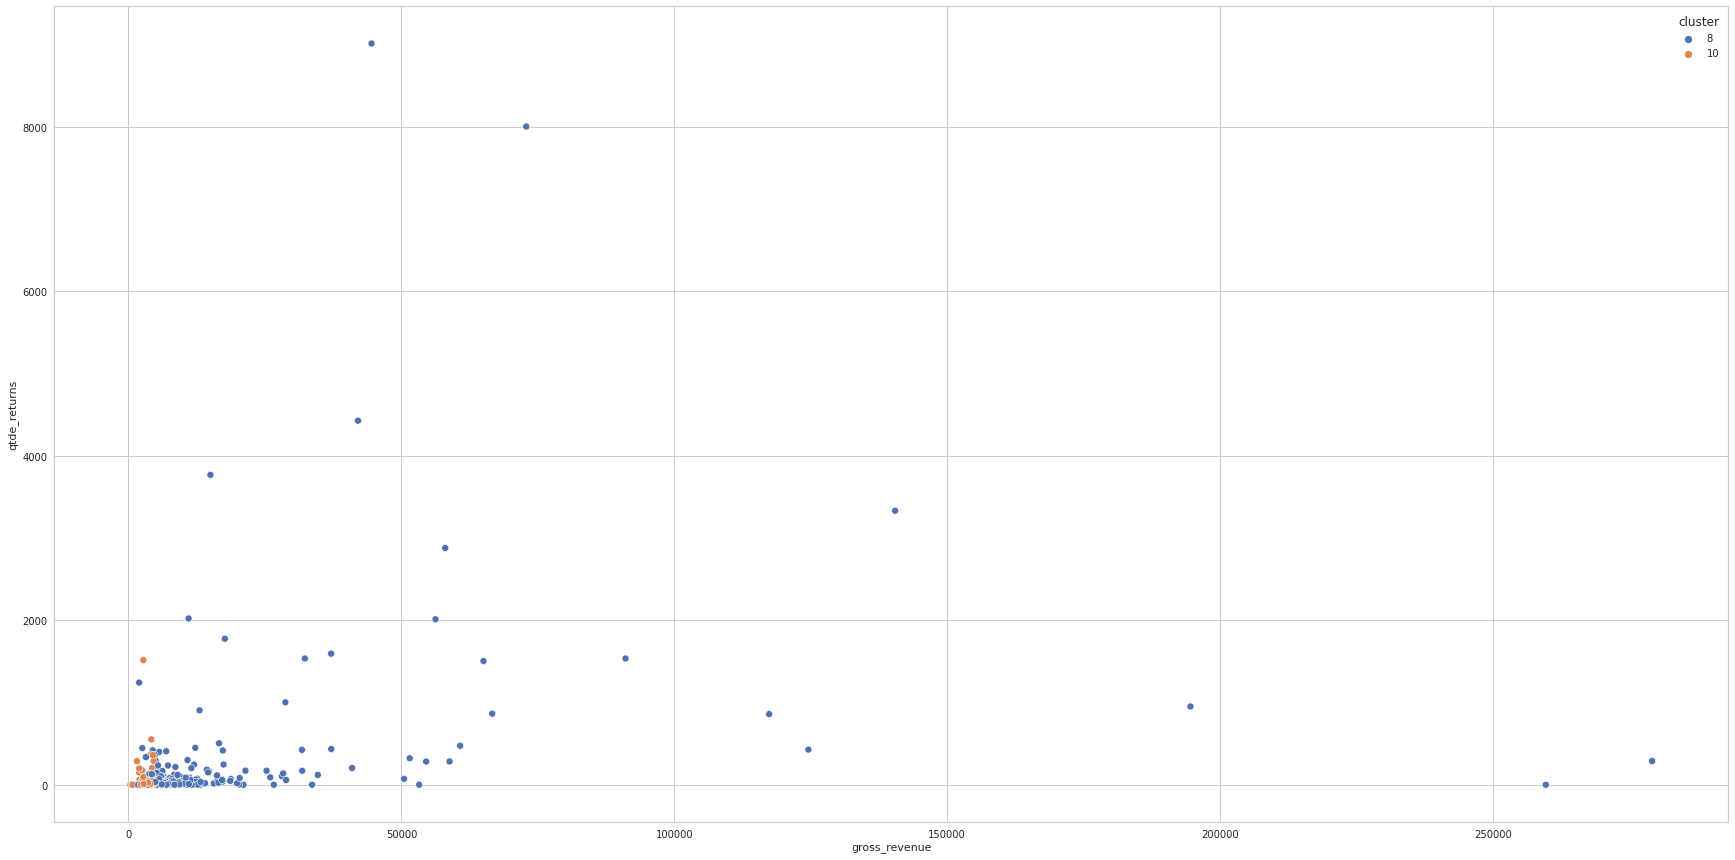

In [89]:
plt.figure(figsize=(30,15))
sns.scatterplot(x='gross_revenue', y='qtde_returns', hue='cluster', data=df9, palette='deep')

## Hypothesis 

## Hypothesis Validation

# 10. Deploy